In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kamilpytlak/personal-key-indicators-of-heart-disease")

print("Path to dataset files:", path)

/Users/jackiewang/Documents/GitHub/COGS109_Indicators_of_Heart_Disease/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/jackiewang/.cache/kagglehub/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/versions/6


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')
import os

# List files in the downloaded directory
print("Files in directory:", os.listdir(path))

# Load the CSV file (adjust filename if different)
csv_file = os.path.join(path, '2022', 'heart_2022_no_nans.csv')
df = pd.read_csv(csv_file)

# Check the shape
print("Dataset shape:", df.shape)
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Files in directory: ['2022', '2020']
Dataset shape: (246022, 40)
Rows: 246022
Columns: 40


In [5]:
# Check class distribution of HadHeartAttack
print("=== Class Distribution of 'HadHeartAttack' ===\n")
print("Counts:")
print(df['HadHeartAttack'].value_counts())
print(f"\nPercentages:")
print(df['HadHeartAttack'].value_counts(normalize=True) * 100)
print(f"\nTotal samples: {len(df):,}")
print(f"Class imbalance ratio: {df['HadHeartAttack'].value_counts()['No'] / df['HadHeartAttack'].value_counts()['Yes']:.2f}:1")

=== Class Distribution of 'HadHeartAttack' ===

Counts:
HadHeartAttack
No     232587
Yes     13435
Name: count, dtype: int64

Percentages:
HadHeartAttack
No     94.539106
Yes     5.460894
Name: proportion, dtype: float64

Total samples: 246,022
Class imbalance ratio: 17.31:1


In [6]:
print(df.head())

     State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 4.0               0.0   
1  Alabama    Male     Very good                 0.0               0.0   
2  Alabama    Male     Very good                 0.0               0.0   
3  Alabama  Female          Fair                 5.0               0.0   
4  Alabama  Female          Good                 3.0              15.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                Yes   
1  Within past year (anytime less than 12 months ...                Yes   
2  Within past year (anytime less than 12 months ...                 No   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours            RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0         9.0            Non

In [7]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

EDA: Exploratory Data Analysis

In [8]:
# Summary statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PhysicalHealthDays,246022.0,4.119026,8.405844,0.00,0.00,0.00,3.00,30.00
MentalHealthDays,246022.0,4.167140,8.102687,0.00,0.00,0.00,4.00,30.00
SleepHours,246022.0,7.021331,1.440681,1.00,6.00,7.00,8.00,24.00
HeightInMeters,246022.0,1.705150,0.106654,0.91,1.63,1.70,1.78,2.41
WeightInKilograms,246022.0,83.615179,21.323156,28.12,68.04,81.65,95.25,292.57
BMI,246022.0,28.668136,6.513973,12.02,24.27,27.46,31.89,97.65


PhysicalHealth - how many days in a month did you feel poor physical health.

MentalHealth - how many days in a month did you feel poor mental health.


## Research Question EDA

Question 1 (Hypothesis Driven): Do individuals with diabetes, stroke history, or poor general health have higher odds of having had a heart attack, after accounting for basic demographic factors?

Question 2 (Data Driven): Can we accurately predict whether an individual has had a heart attack based on lifestyle behaviors and existing chronic health conditions?


Heart Attack Distribution:
HadHeartAttack
No     232587
Yes     13435
Name: count, dtype: int64

Percentage distribution:
HadHeartAttack
No     94.539106
Yes     5.460894
Name: proportion, dtype: float64


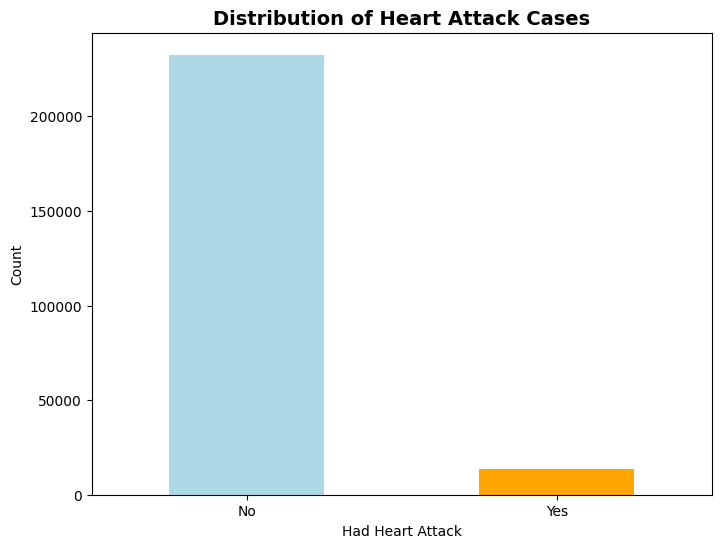

In [9]:
print("Heart Attack Distribution:")
print(df['HadHeartAttack'].value_counts())
print(f"\nPercentage distribution:")
print(df['HadHeartAttack'].value_counts(normalize=True) * 100)

# Create a more readable plot
plt.figure(figsize=(8, 6))
df['HadHeartAttack'].value_counts().plot(kind='bar', color=['lightblue', 'orange'])
plt.title('Distribution of Heart Attack Cases', fontsize=14, fontweight='bold')
plt.xlabel('Had Heart Attack')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [10]:
# Diabetes, Stroke, General Health vs Heart Attack
key_vars_q1 = ['HadDiabetes', 'HadStroke', 'GeneralHealth', 'AgeCategory', 'Sex', 'BMI']

print("\n1. Diabetes vs Heart Attack:")
crosstab_diabetes = pd.crosstab(df['HadDiabetes'], df['HadHeartAttack'], normalize='index') * 100
print(crosstab_diabetes)

print("\n2. Stroke vs Heart Attack:")
crosstab_stroke = pd.crosstab(df['HadStroke'], df['HadHeartAttack'], normalize='index') * 100
print(crosstab_stroke)

print("\n3. General Health vs Heart Attack:")
crosstab_health = pd.crosstab(df['GeneralHealth'], df['HadHeartAttack'], normalize='index') * 100
print(crosstab_health)


1. Diabetes vs Heart Attack:
HadHeartAttack                                  No        Yes
HadDiabetes                                                  
No                                       95.931828   4.068172
No, pre-diabetes or borderline diabetes  92.729970   7.270030
Yes                                      86.236063  13.763937
Yes, but only during pregnancy (female)  97.175996   2.824004

2. Stroke vs Heart Attack:
HadHeartAttack         No        Yes
HadStroke                           
No              95.372388   4.627612
Yes             75.098892  24.901108

3. General Health vs Heart Attack:
HadHeartAttack         No        Yes
GeneralHealth                       
Excellent       98.569536   1.430464
Fair            87.775205  12.224795
Good            94.058830   5.941170
Poor            78.536585  21.463415
Very good       97.160887   2.839113


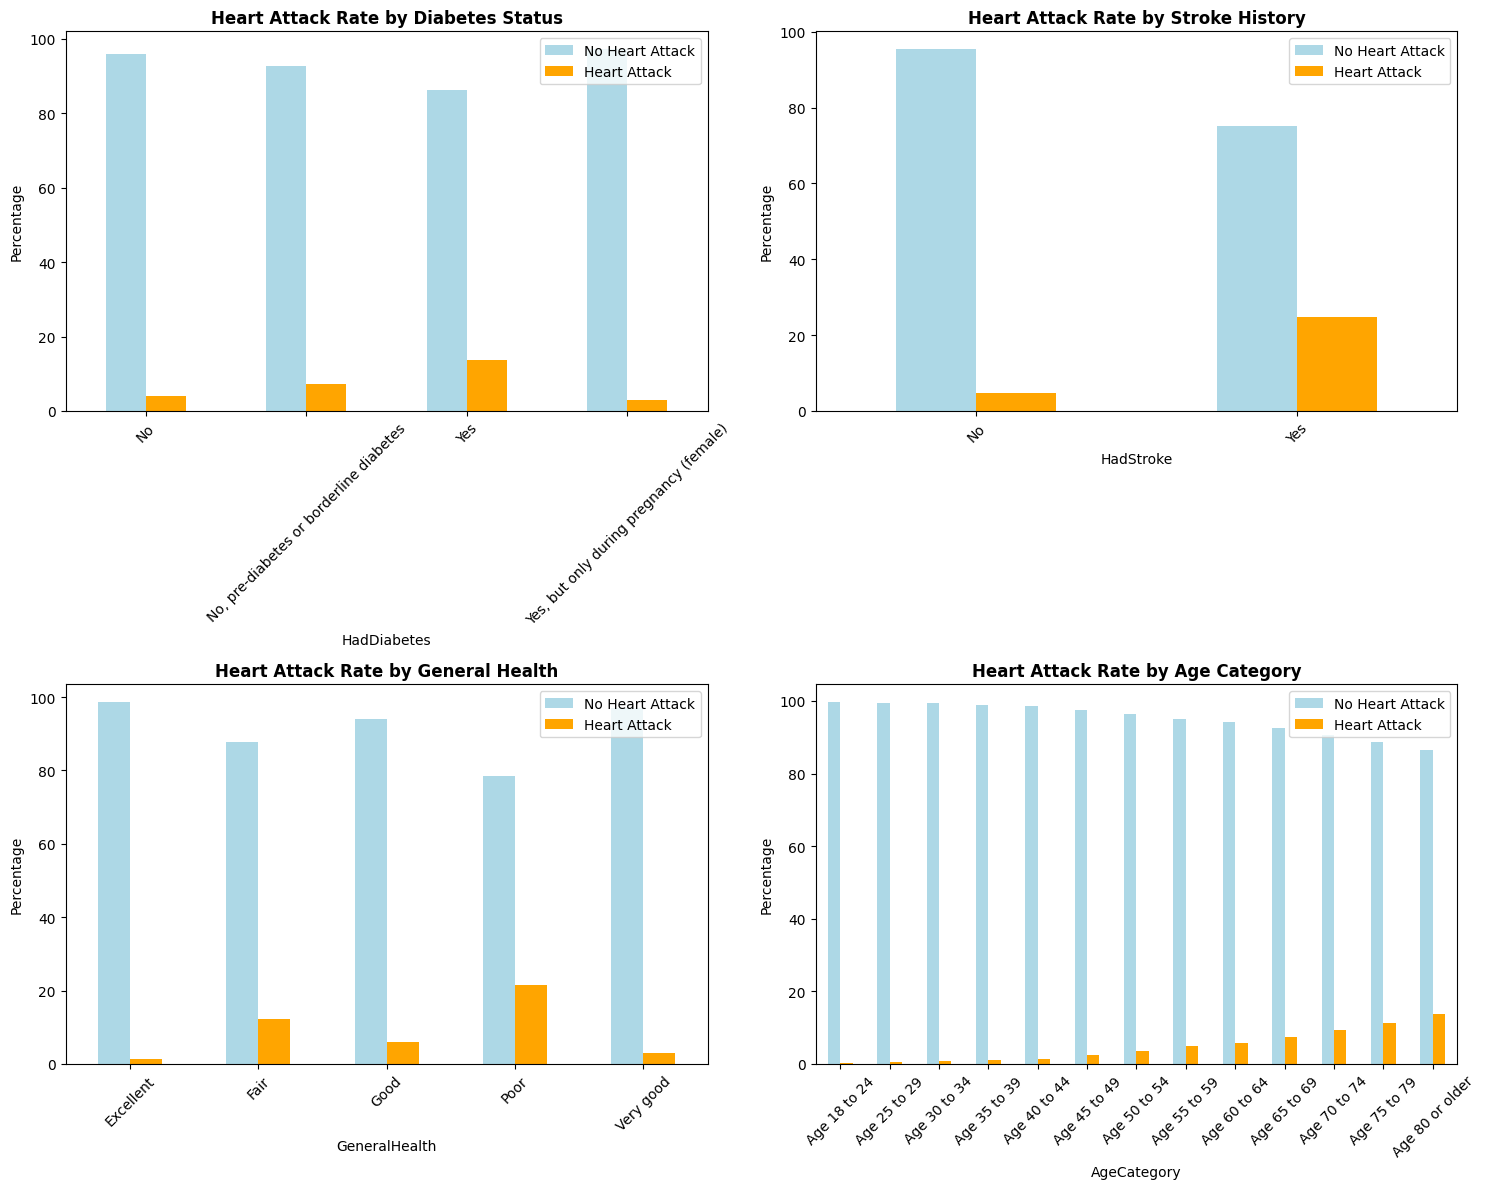

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Diabetes vs Heart Attack
ax1 = axes[0, 0]
diabetes_ha = pd.crosstab(df['HadDiabetes'], df['HadHeartAttack'], normalize='index') * 100
diabetes_ha.plot(kind='bar', ax=ax1, color=['lightblue', 'orange'])
ax1.set_title('Heart Attack Rate by Diabetes Status', fontweight='bold')
ax1.set_ylabel('Percentage')
ax1.legend(['No Heart Attack', 'Heart Attack'])
ax1.tick_params(axis='x', rotation=45)

# Stroke vs Heart Attack
ax2 = axes[0, 1]
stroke_ha = pd.crosstab(df['HadStroke'], df['HadHeartAttack'], normalize='index') * 100
stroke_ha.plot(kind='bar', ax=ax2, color=['lightblue', 'orange'])
ax2.set_title('Heart Attack Rate by Stroke History', fontweight='bold')
ax2.set_ylabel('Percentage')
ax2.legend(['No Heart Attack', 'Heart Attack'])
ax2.tick_params(axis='x', rotation=45)

# General Health vs Heart Attack
ax3 = axes[1, 0]
health_ha = pd.crosstab(df['GeneralHealth'], df['HadHeartAttack'], normalize='index') * 100
health_ha.plot(kind='bar', ax=ax3, color=['lightblue', 'orange'])
ax3.set_title('Heart Attack Rate by General Health', fontweight='bold')
ax3.set_ylabel('Percentage')
ax3.legend(['No Heart Attack', 'Heart Attack'])
ax3.tick_params(axis='x', rotation=45)

# Age vs Heart Attack
ax4 = axes[1, 1]
age_ha = pd.crosstab(df['AgeCategory'], df['HadHeartAttack'], normalize='index') * 100
age_ha.plot(kind='bar', ax=ax4, color=['lightblue', 'orange'])
ax4.set_title('Heart Attack Rate by Age Category', fontweight='bold')
ax4.set_ylabel('Percentage')
ax4.legend(['No Heart Attack', 'Heart Attack'])
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Question 2 EDA: Lifestyle Behaviors and Chronic Conditions

In [12]:
# Lifestyle behaviors and chronic conditions analysis
lifestyle_vars = ['SmokerStatus', 'AlcoholDrinkers', 'PhysicalActivities', 'SleepHours']
chronic_conditions = ['HadDiabetes', 'HadStroke', 'HadAsthma', 'HadKidneyDisease', 
                     'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadArthritis']

# Smoking status
print("\n1. Smoking Status vs Heart Attack:")
smoking_ha = pd.crosstab(df['SmokerStatus'], df['HadHeartAttack'], normalize='index') * 100
print(smoking_ha)

# Alcohol consumption
print("\n2. Alcohol Consumption vs Heart Attack:")
alcohol_ha = pd.crosstab(df['AlcoholDrinkers'], df['HadHeartAttack'], normalize='index') * 100
print(alcohol_ha)

# Physical activity
print("\n3. Physical Activity vs Heart Attack:")
activity_ha = pd.crosstab(df['PhysicalActivities'], df['HadHeartAttack'], normalize='index') * 100
print(activity_ha)


1. Smoking Status vs Heart Attack:
HadHeartAttack                                No       Yes
SmokerStatus                                              
Current smoker - now smokes every day  91.684750  8.315250
Current smoker - now smokes some days  93.171997  6.828003
Former smoker                          91.813446  8.186554
Never smoked                           96.296798  3.703202

2. Alcohol Consumption vs Heart Attack:
HadHeartAttack          No       Yes
AlcoholDrinkers                     
No               92.675789  7.324211
Yes              96.063766  3.936234

3. Physical Activity vs Heart Attack:
HadHeartAttack             No       Yes
PhysicalActivities                     
No                  91.004314  8.995686
Yes                 95.549818  4.450182


In [13]:
# Chronic conditions analysis
print("\nChronic Conditions vs Heart Attack:")
chronic_results = {}

for condition in chronic_conditions:
    if condition in df.columns:
        condition_ha = pd.crosstab(df[condition], df['HadHeartAttack'], normalize='index') * 100
        if 'Yes' in condition_ha.index:
            heart_attack_rate = condition_ha.loc['Yes', 'Yes'] if 'Yes' in condition_ha.columns else 0
            chronic_results[condition] = heart_attack_rate
            print(f"\n{condition}:")
            print(condition_ha)

# Summary of heart attack rates by chronic condition
chronic_summary = pd.DataFrame(list(chronic_results.items()), 
                             columns=['Condition', 'Heart_Attack_Rate_%'])
chronic_summary = chronic_summary.sort_values('Heart_Attack_Rate_%', ascending=False)
print(chronic_summary)


Chronic Conditions vs Heart Attack:

HadDiabetes:
HadHeartAttack                                  No        Yes
HadDiabetes                                                  
No                                       95.931828   4.068172
No, pre-diabetes or borderline diabetes  92.729970   7.270030
Yes                                      86.236063  13.763937
Yes, but only during pregnancy (female)  97.175996   2.824004

HadStroke:
HadHeartAttack         No        Yes
HadStroke                           
No              95.372388   4.627612
Yes             75.098892  24.901108

HadAsthma:
HadHeartAttack         No       Yes
HadAsthma                          
No              94.764503  5.235497
Yes             93.246462  6.753538

HadKidneyDisease:
HadHeartAttack           No        Yes
HadKidneyDisease                      
No                95.083881   4.916119
Yes               83.206310  16.793690

HadSkinCancer:
HadHeartAttack         No       Yes
HadSkinCancer                     

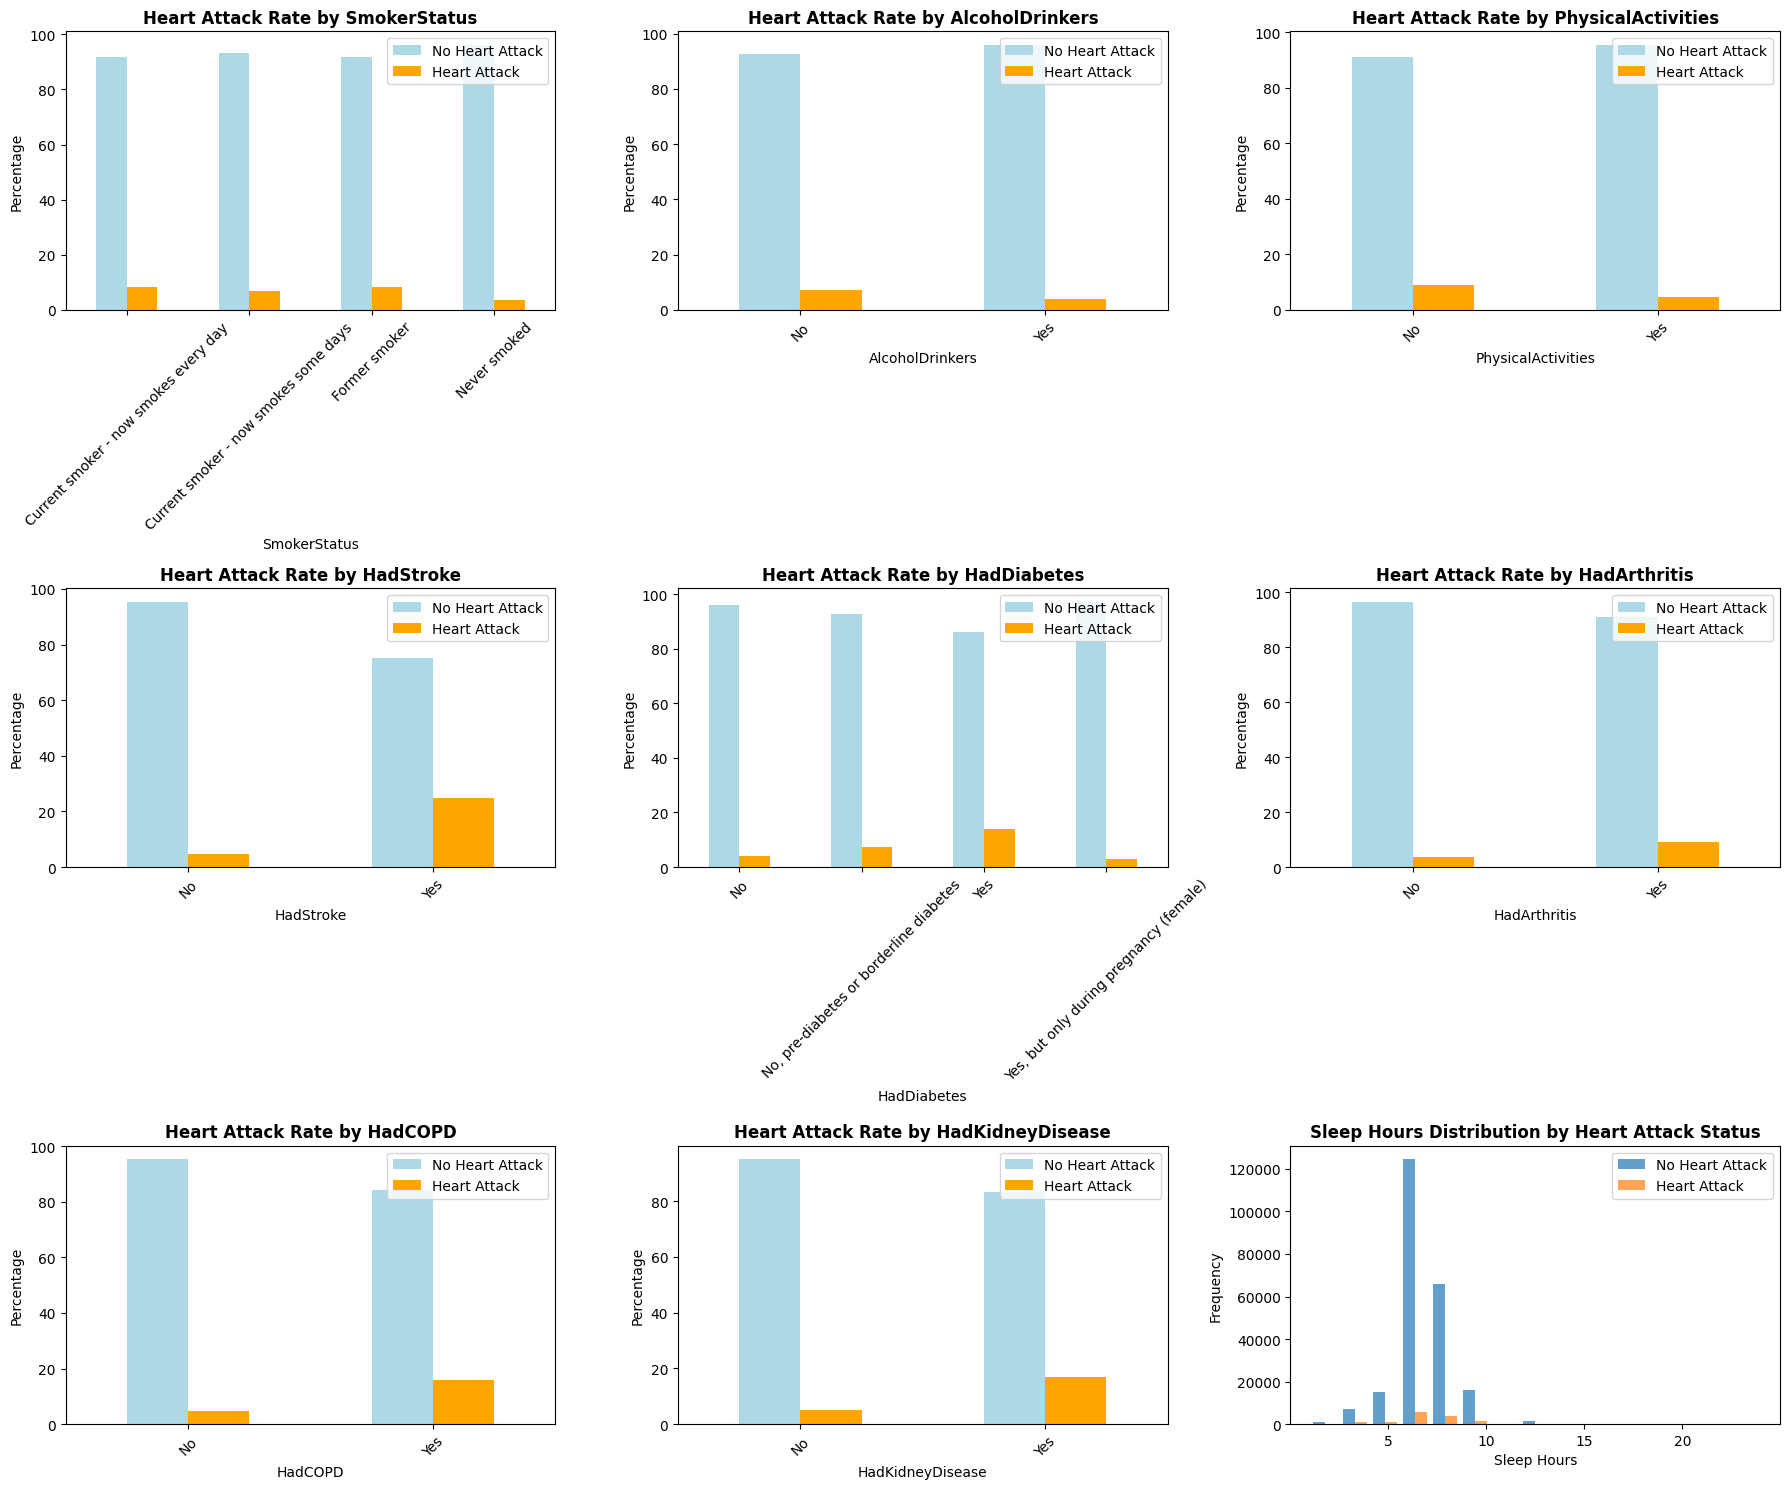

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

# Lifestyle variables
lifestyle_vars = ['SmokerStatus', 'AlcoholDrinkers', 'PhysicalActivities']
for i, var in enumerate(lifestyle_vars):
    var_ha = pd.crosstab(df[var], df['HadHeartAttack'], normalize='index') * 100
    var_ha.plot(kind='bar', ax=axes[i], color=['lightblue', 'orange'])
    axes[i].set_title(f'Heart Attack Rate by {var}', fontweight='bold')
    axes[i].set_ylabel('Percentage')
    axes[i].legend(['No Heart Attack', 'Heart Attack'])
    axes[i].tick_params(axis='x', rotation=45)

# Top chronic conditions
top_chronic = ['HadStroke', 'HadDiabetes', 'HadArthritis', 'HadCOPD', 'HadKidneyDisease']
for i, condition in enumerate(top_chronic):
    if condition in df.columns:
        condition_ha = pd.crosstab(df[condition], df['HadHeartAttack'], normalize='index') * 100
        condition_ha.plot(kind='bar', ax=axes[i+3], color=['lightblue', 'orange'])
        axes[i+3].set_title(f'Heart Attack Rate by {condition}', fontweight='bold')
        axes[i+3].set_ylabel('Percentage')
        axes[i+3].legend(['No Heart Attack', 'Heart Attack'])
        axes[i+3].tick_params(axis='x', rotation=45)

# Sleep hours analysis
axes[8].hist([df[df['HadHeartAttack']=='No']['SleepHours'], 
              df[df['HadHeartAttack']=='Yes']['SleepHours']], 
             alpha=0.7, label=['No Heart Attack', 'Heart Attack'], bins=15)
axes[8].set_title('Sleep Hours Distribution by Heart Attack Status', fontweight='bold')
axes[8].set_xlabel('Sleep Hours')
axes[8].set_ylabel('Frequency')
axes[8].legend()

plt.tight_layout()
plt.show()

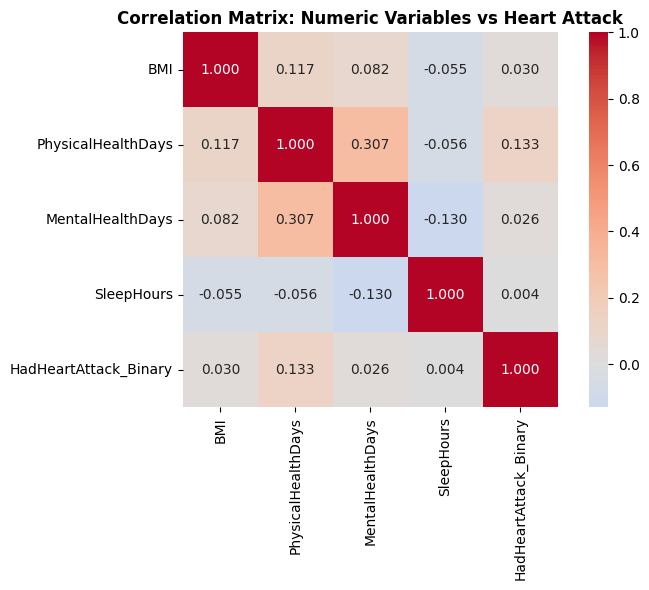

Correlation with Heart Attack:
PhysicalHealthDays    0.133420
BMI                   0.030413
MentalHealthDays      0.025892
SleepHours            0.003631
Name: HadHeartAttack_Binary, dtype: float64


In [15]:
# Correlation analysis for numeric variables
numeric_for_corr = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours']

# Create binary version of heart attack for correlation
df_corr = df.copy()
df_corr['HadHeartAttack_Binary'] = (df_corr['HadHeartAttack'] == 'Yes').astype(int)

# Correlation matrix
corr_matrix = df_corr[numeric_for_corr + ['HadHeartAttack_Binary']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f')
plt.title('Correlation Matrix: Numeric Variables vs Heart Attack', fontweight='bold')
plt.tight_layout()
plt.show()

print("Correlation with Heart Attack:")
correlations = corr_matrix['HadHeartAttack_Binary'].drop('HadHeartAttack_Binary').sort_values(key=abs, ascending=False)
print(correlations)

## Step 2: Encode & Prepare Data

Prepare the data for modeling by encoding categorical variables.

In [16]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Create df_model as a copy of the dataframe
df_model = df.copy()

# Step 2: Convert 'HadHeartAttack' to binary (1 for 'Yes', 0 for 'No')
df_model['HadHeartAttack'] = (df_model['HadHeartAttack'] == 'Yes').astype(int)

print("Target variable converted to binary:")
print(df_model['HadHeartAttack'].value_counts())
print(f"\nClass distribution: {df_model['HadHeartAttack'].value_counts(normalize=True) * 100}")

# Step 3: Identify categorical columns (excluding the already-encoded target)
categorical_cols = df_model.select_dtypes(include=['object']).columns.tolist()

print(f"\nCategorical columns to encode: {len(categorical_cols)}")
print(categorical_cols)

# Step 4: Encode all categorical columns using LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le
    print(f"Encoded: {col} - {len(le.classes_)} unique values")

print(f"\n✓ Data preparation complete!")
print(f"Shape: {df_model.shape}")
print(f"All columns are now numeric: {df_model.select_dtypes(include=['object']).shape[1] == 0}")

Target variable converted to binary:
HadHeartAttack
0    232587
1     13435
Name: count, dtype: int64

Class distribution: HadHeartAttack
0    94.539106
1     5.460894
Name: proportion, dtype: float64

Categorical columns to encode: 33
['State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']
Encoded: State - 54 unique values
Encoded: Sex - 2 unique values
Encoded: GeneralHealth - 5 unique values
Encoded: LastCheckupTime - 4 unique values
Encoded: PhysicalActivitie

In [17]:
# Verify the encoding
print("=== Verification ===")
print(f"\nDataframe info:")
print(df_model.info())

print(f"\nFirst few rows of encoded data:")
print(df_model.head())

print(f"\nTarget variable 'HadHeartAttack':")
print(f"  Data type: {df_model['HadHeartAttack'].dtype}")
print(f"  Unique values: {df_model['HadHeartAttack'].unique()}")
print(f"  Value counts:\n{df_model['HadHeartAttack'].value_counts()}")

=== Verification ===

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  int64  
 1   Sex                        246022 non-null  int64  
 2   GeneralHealth              246022 non-null  int64  
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  int64  
 6   PhysicalActivities         246022 non-null  int64  
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  int64  
 9   HadHeartAttack             246022 non-null  int64  
 10  HadAngina                  246022 non-null  int64  
 11  HadStroke                  246022 non-null  int64  
 12  HadAsthma                  246022 non-null  int6

In [18]:
## Step 3: Train/Test Split & Correlation Analysis

## Split the data and analyze correlations to identify the most important features.

In [19]:
from sklearn.model_selection import train_test_split

# Step 1: Separate features (X) and target (y)
X = df_model.drop('HadHeartAttack', axis=1)
y = df_model['HadHeartAttack']

print("Features and target separated:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Step 2: Create train/test split (80/20, stratified, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"\nTrain/Test Split Complete:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape:  {y_test.shape}")

print(f"\nClass distribution in train set:")
print(y_train.value_counts(normalize=True) * 100)
print(f"\nClass distribution in test set:")
print(y_test.value_counts(normalize=True) * 100)

Features and target separated:
X shape: (246022, 39)
y shape: (246022,)

Train/Test Split Complete:
X_train shape: (196817, 39)
X_test shape:  (49205, 39)
y_train shape: (196817,)
y_test shape:  (49205,)

Class distribution in train set:
HadHeartAttack
0    94.53909
1     5.46091
Name: proportion, dtype: float64

Class distribution in test set:
HadHeartAttack
0    94.539173
1     5.460827
Name: proportion, dtype: float64


In [20]:
# Step 3: Calculate correlations on TRAINING SET ONLY (to avoid data leakage)
# Combine X_train and y_train for correlation analysis
train_data = X_train.copy()
train_data['HadHeartAttack'] = y_train

# Calculate correlations with the target variable
corrs = train_data.corr()['HadHeartAttack'].drop('HadHeartAttack').sort_values(key=abs, ascending=False)

# Step 4: Display top 15 features by absolute correlation value
print("=== TOP 15 FEATURES BY CORRELATION (Training Set) ===\n")
top15_corrs = corrs.head(15)

for i, (feature, corr_val) in enumerate(top15_corrs.items(), 1):
    print(f"{i:2d}. {feature[:45]:45} correlation = {corr_val:7.4f}")

print(f"\n\nTop 15 correlations:")
print(top15_corrs)

=== TOP 15 FEATURES BY CORRELATION (Training Set) ===

 1. HadAngina                                     correlation =  0.4472
 2. HadStroke                                     correlation =  0.1793
 3. AgeCategory                                   correlation =  0.1724
 4. ChestScan                                     correlation =  0.1662
 5. DifficultyWalking                             correlation =  0.1595
 6. HadDiabetes                                   correlation =  0.1365
 7. HadCOPD                                       correlation =  0.1338
 8. PhysicalHealthDays                            correlation =  0.1327
 9. PneumoVaxEver                                 correlation =  0.1204
10. HadArthritis                                  correlation =  0.1165
11. HadKidneyDisease                              correlation =  0.1093
12. DeafOrHardOfHearing                           correlation =  0.0975
13. DifficultyErrands                             correlation =  0.0912
14. Diffi

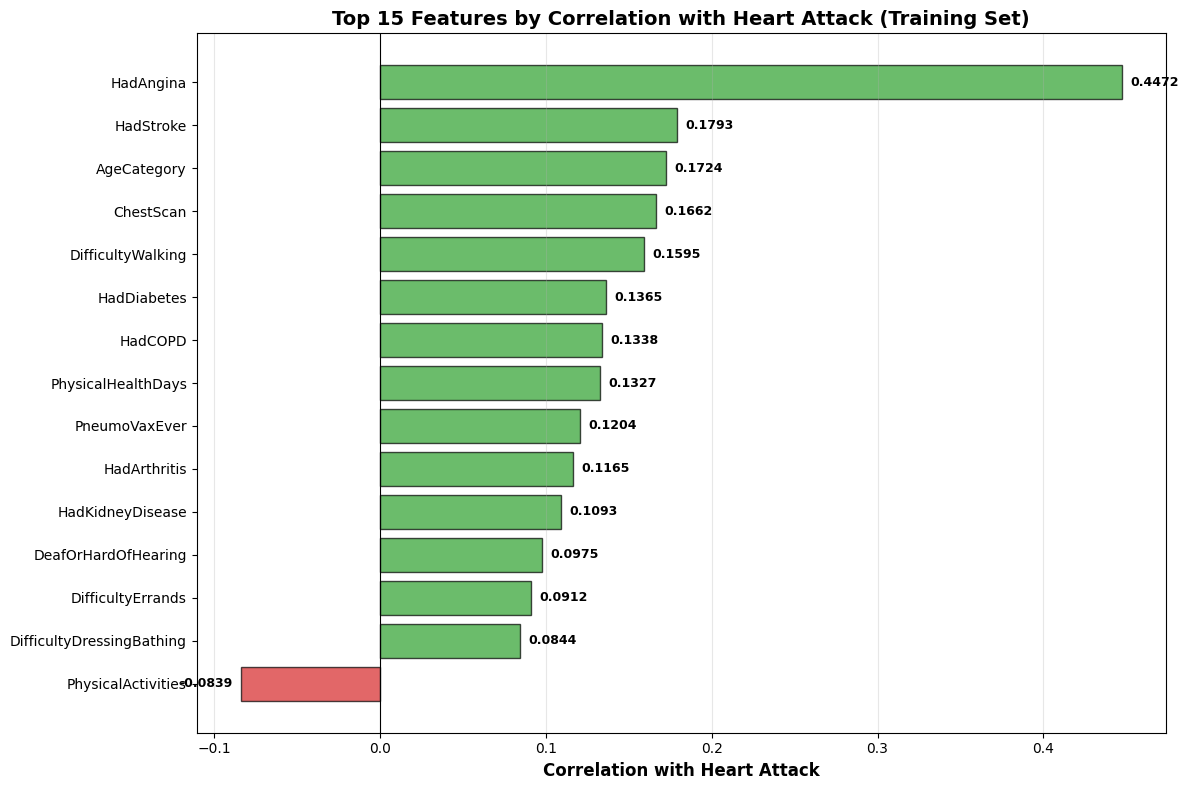


✓ Correlation analysis complete - using TRAINING SET ONLY to avoid data leakage!


In [21]:
# Step 5: Create a bar plot showing top 15 correlations
fig, ax = plt.subplots(figsize=(12, 8))

# Get top 15 correlations
top15_features = top15_corrs.head(15)
features = top15_features.index
values = top15_features.values

# Create bar plot with colors based on positive/negative correlation
colors_bar = ['#d62728' if v < 0 else '#2ca02c' for v in values]
bars = ax.barh(range(len(features)), values, color=colors_bar, alpha=0.7, edgecolor='black')

# Customize plot
ax.set_yticks(range(len(features)))
ax.set_yticklabels(features, fontsize=10)
ax.set_xlabel('Correlation with Heart Attack', fontsize=12, fontweight='bold')
ax.set_title('Top 15 Features by Correlation with Heart Attack (Training Set)', 
             fontsize=14, fontweight='bold')
ax.axvline(0, color='black', linewidth=0.8)
ax.grid(alpha=0.3, axis='x')

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, values)):
    label_x = val + (0.005 if val > 0 else -0.005)
    ha = 'left' if val > 0 else 'right'
    ax.text(label_x, bar.get_y() + bar.get_height()/2, f'{val:.4f}', 
            ha=ha, va='center', fontsize=9, fontweight='bold')

# Invert y-axis so highest correlation is on top
ax.invert_yaxis()

plt.tight_layout()
plt.show()

print("\n✓ Correlation analysis complete - using TRAINING SET ONLY to avoid data leakage!")

In [22]:
## Step 4: Naive Baseline Model

## Establish a baseline performance using a simple "most frequent class" classifier. This helps us understand the minimum performance we should expect from any real model.

In [23]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, confusion_matrix, classification_report
)

# Step 1 & 2: Create and fit DummyClassifier with strategy='most_frequent'
naive_model = DummyClassifier(strategy='most_frequent', random_state=42)
naive_model.fit(X_train, y_train)

# Step 3: Predict on test data
y_pred_naive = naive_model.predict(X_test)
y_pred_proba_naive = naive_model.predict_proba(X_test)[:, 1]

print("=== NAIVE BASELINE MODEL (Most Frequent Class) ===\n")
print(f"Strategy: Always predict the most frequent class from training data")
print(f"\nPrediction breakdown:")
print(f"  - Predicts 'No Heart Attack' (0): {np.sum(y_pred_naive == 0):,}")
print(f"  - Predicts 'Heart Attack' (1): {np.sum(y_pred_naive == 1):,}")
print(f"\nUnique predictions: {np.unique(y_pred_naive)}")

=== NAIVE BASELINE MODEL (Most Frequent Class) ===

Strategy: Always predict the most frequent class from training data

Prediction breakdown:
  - Predicts 'No Heart Attack' (0): 49,205
  - Predicts 'Heart Attack' (1): 0

Unique predictions: [0]


In [24]:
# Step 4: Calculate and print metrics
naive_accuracy = accuracy_score(y_test, y_pred_naive)
naive_precision = precision_score(y_test, y_pred_naive, zero_division=0)
naive_recall = recall_score(y_test, y_pred_naive, zero_division=0)
naive_f1 = f1_score(y_test, y_pred_naive, zero_division=0)
naive_auc = roc_auc_score(y_test, y_pred_proba_naive)

print("\n=== NAIVE BASELINE PERFORMANCE METRICS ===\n")
print(f"Accuracy:  {naive_accuracy:.4f}")
print(f"Precision: {naive_precision:.4f}")
print(f"Recall:    {naive_recall:.4f}")
print(f"F1-Score:  {naive_f1:.4f}")
print(f"AUC-ROC:   {naive_auc:.4f}")

print("\n" + "="*50)
print("CLASSIFICATION REPORT")
print("="*50)
print(classification_report(y_test, y_pred_naive, 
                          target_names=['No Heart Attack (0)', 'Heart Attack (1)'],
                          zero_division=0))


=== NAIVE BASELINE PERFORMANCE METRICS ===

Accuracy:  0.9454
Precision: 0.0000
Recall:    0.0000
F1-Score:  0.0000
AUC-ROC:   0.5000

CLASSIFICATION REPORT
                     precision    recall  f1-score   support

No Heart Attack (0)       0.95      1.00      0.97     46518
   Heart Attack (1)       0.00      0.00      0.00      2687

           accuracy                           0.95     49205
          macro avg       0.47      0.50      0.49     49205
       weighted avg       0.89      0.95      0.92     49205



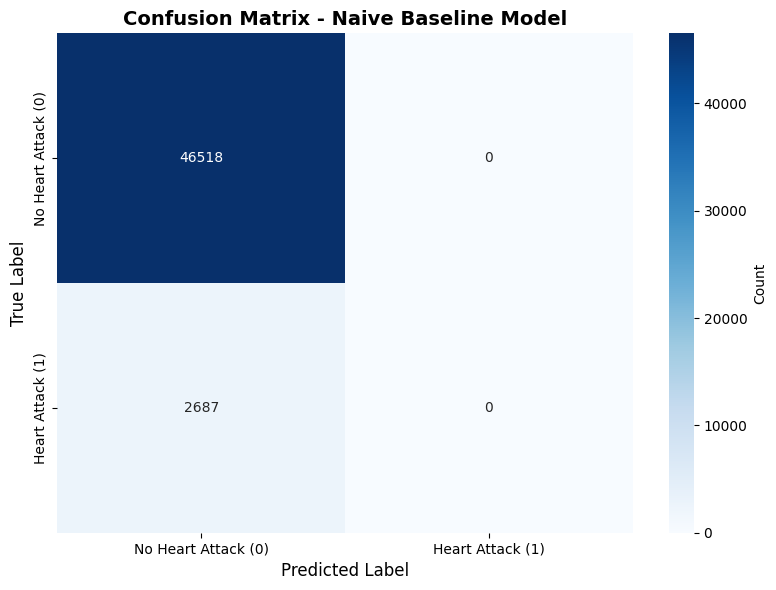


Confusion Matrix Breakdown:
True Negatives (TN):  46,518 - Correctly predicted NO heart attack
False Positives (FP): 0 - Incorrectly predicted heart attack
False Negatives (FN): 2,687 - Missed actual heart attacks
True Positives (TP):  0 - Correctly predicted heart attack


In [25]:
# Step 5: Create confusion matrix heatmap
cm_naive = confusion_matrix(y_test, y_pred_naive)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_naive, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Heart Attack (0)', 'Heart Attack (1)'],
            yticklabels=['No Heart Attack (0)', 'Heart Attack (1)'],
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Naive Baseline Model', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

print("\nConfusion Matrix Breakdown:")
print(f"True Negatives (TN):  {cm_naive[0, 0]:,} - Correctly predicted NO heart attack")
print(f"False Positives (FP): {cm_naive[0, 1]:,} - Incorrectly predicted heart attack")
print(f"False Negatives (FN): {cm_naive[1, 0]:,} - Missed actual heart attacks")
print(f"True Positives (TP):  {cm_naive[1, 1]:,} - Correctly predicted heart attack")

### What Does This Baseline Represent?

**The Naive Baseline Model** uses the simplest possible prediction strategy: **always predict the most frequent class** in the training data.

**Key Observations:**
- Since ~94.5% of people in the dataset did NOT have a heart attack, this model **always predicts "No Heart Attack"**
- **Accuracy appears high (~94.5%)** but this is misleading - it's just predicting the majority class
- **Recall = 0.0**: The model **never identifies anyone who actually had a heart attack** (completely fails at the task)
- **Precision = 0.0**: Since it never predicts positive cases, precision is undefined (set to 0)
- **F1-Score = 0.0**: Harmonic mean of precision and recall
- **AUC-ROC = 0.5**: Equivalent to random guessing (no discriminative ability)

**Why This Matters:**
This baseline establishes the **minimum acceptable performance**. Any real predictive model must:
1. Achieve **accuracy > 94.5%** (better than always saying "no")
2. Achieve **AUC-ROC > 0.5** (better than random guessing)
3. Have **recall > 0** (actually identify some heart attack cases)
4. Provide **actionable predictions** (not just predict one class)

**The Challenge:**
With such severe class imbalance (94.5% vs 5.5%), we need models that can identify the minority class (heart attacks) without sacrificing too much accuracy. Simply beating the naive baseline on accuracy is not enough - we need meaningful recall and precision.

## Step 5: V1 - Simple Baseline (Top 3 Features)

# Build a simple logistic regression model using only the top 3 most correlated features to establish a stronger baseline than the naive classifier.

### Logistic Regression Model

The logistic regression model predicts the log-odds of heart attack occurrence using the following equation:

$$\log\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p$$

Where:
- $p$ = probability of having a heart attack
- $\frac{p}{1-p}$ = odds of having a heart attack
- $\beta_0$ = intercept
- $\beta_1, \beta_2, ..., \beta_p$ = coefficients for each predictor
- $x_1, x_2, ..., x_p$ = predictor variables (features)

**Key Properties:**
- Outputs probabilities between 0 and 1
- Uses maximum likelihood estimation (MLE) for parameter estimation
- Assumes linear relationship between predictors and log-odds
- Well-suited for binary classification with class imbalance when using `class_weight='balanced'`

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Step 1: Select top 3 features by absolute correlation from training set
top3_features = corrs.head(3).index.tolist()

print("=== V1 - SIMPLE BASELINE MODEL (Top 3 Features) ===\n")
print(f"Selected features based on correlation analysis:")
for i, (feature, corr_val) in enumerate(zip(top3_features, corrs.head(3).values), 1):
    print(f"{i}. {feature:30} correlation = {corr_val:7.4f}")

# Extract top 3 features from train and test sets
X_train_v1 = X_train[top3_features]
X_test_v1 = X_test[top3_features]

print(f"\nFeature subset shapes:")
print(f"X_train_v1: {X_train_v1.shape}")
print(f"X_test_v1:  {X_test_v1.shape}")

=== V1 - SIMPLE BASELINE MODEL (Top 3 Features) ===

Selected features based on correlation analysis:
1. HadAngina                      correlation =  0.4472
2. HadStroke                      correlation =  0.1793
3. AgeCategory                    correlation =  0.1724

Feature subset shapes:
X_train_v1: (196817, 3)
X_test_v1:  (49205, 3)


In [27]:
# Step 2: Scale features using StandardScaler (fit on train, transform both)
scaler_v1 = StandardScaler()
X_train_v1_scaled = scaler_v1.fit_transform(X_train_v1)
X_test_v1_scaled = scaler_v1.transform(X_test_v1)

print("\n=== Feature Scaling ===")
print(f"Scaler fitted on training data and applied to both sets")
print(f"\nScaling statistics (from training data):")
for i, feature in enumerate(top3_features):
    print(f"{feature:30} mean={scaler_v1.mean_[i]:8.4f}  std={scaler_v1.scale_[i]:8.4f}")


=== Feature Scaling ===
Scaler fitted on training data and applied to both sets

Scaling statistics (from training data):
HadAngina                      mean=  0.0609  std=  0.2392
HadStroke                      mean=  0.0411  std=  0.1986
AgeCategory                    mean=  6.7222  std=  3.4646


In [28]:
# Step 3 & 4: Create and fit LogisticRegression with class_weight='balanced'
model_v1 = LogisticRegression(
    class_weight='balanced',  # Handle class imbalance
    max_iter=1000,
    random_state=42
)

print("\n=== Model Training ===")
print(f"Model: LogisticRegression")
print(f"  - class_weight='balanced' (handles class imbalance)")
print(f"  - max_iter=1000")
print(f"  - random_state=42")

model_v1.fit(X_train_v1_scaled, y_train)
print(f"\n✓ Model fitted successfully!")


=== Model Training ===
Model: LogisticRegression
  - class_weight='balanced' (handles class imbalance)
  - max_iter=1000
  - random_state=42

✓ Model fitted successfully!


In [29]:
# Step 5 & 6: Predict and calculate metrics
y_pred_v1 = model_v1.predict(X_test_v1_scaled)
y_pred_proba_v1 = model_v1.predict_proba(X_test_v1_scaled)[:, 1]

# Calculate metrics
v1_accuracy = accuracy_score(y_test, y_pred_v1)
v1_precision = precision_score(y_test, y_pred_v1, zero_division=0)
v1_recall = recall_score(y_test, y_pred_v1, zero_division=0)
v1_f1 = f1_score(y_test, y_pred_v1, zero_division=0)
v1_auc = roc_auc_score(y_test, y_pred_proba_v1)

print("\n" + "="*60)
print("V1 MODEL PERFORMANCE METRICS (Top 3 Features)")
print("="*60)
print(f"Accuracy:  {v1_accuracy:.4f}")
print(f"Precision: {v1_precision:.4f}")
print(f"Recall:    {v1_recall:.4f}")
print(f"F1-Score:  {v1_f1:.4f}")
print(f"AUC-ROC:   {v1_auc:.4f}")

print("\n" + "="*60)
print("CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, y_pred_v1, 
                          target_names=['No Heart Attack (0)', 'Heart Attack (1)'],
                          zero_division=0))

print("\n" + "="*60)
print("COMPARISON WITH NAIVE BASELINE")
print("="*60)
print(f"{'Metric':<15} {'Naive':>12} {'V1 Model':>12} {'Improvement':>15}")
print("-" * 60)
print(f"{'Accuracy':<15} {naive_accuracy:>12.4f} {v1_accuracy:>12.4f} {v1_accuracy-naive_accuracy:>+14.4f}")
print(f"{'Precision':<15} {naive_precision:>12.4f} {v1_precision:>12.4f} {v1_precision-naive_precision:>+14.4f}")
print(f"{'Recall':<15} {naive_recall:>12.4f} {v1_recall:>12.4f} {v1_recall-naive_recall:>+14.4f}")
print(f"{'F1-Score':<15} {naive_f1:>12.4f} {v1_f1:>12.4f} {v1_f1-naive_f1:>+14.4f}")
print(f"{'AUC-ROC':<15} {naive_auc:>12.4f} {v1_auc:>12.4f} {v1_auc-naive_auc:>+14.4f}")


V1 MODEL PERFORMANCE METRICS (Top 3 Features)
Accuracy:  0.8733
Precision: 0.2462
Recall:    0.6397
F1-Score:  0.3555
AUC-ROC:   0.8455

CLASSIFICATION REPORT
                     precision    recall  f1-score   support

No Heart Attack (0)       0.98      0.89      0.93     46518
   Heart Attack (1)       0.25      0.64      0.36      2687

           accuracy                           0.87     49205
          macro avg       0.61      0.76      0.64     49205
       weighted avg       0.94      0.87      0.90     49205


COMPARISON WITH NAIVE BASELINE
Metric                 Naive     V1 Model     Improvement
------------------------------------------------------------
Accuracy              0.9454       0.8733        -0.0720
Precision             0.0000       0.2462        +0.2462
Recall                0.0000       0.6397        +0.6397
F1-Score              0.0000       0.3555        +0.3555
AUC-ROC               0.5000       0.8455        +0.3455


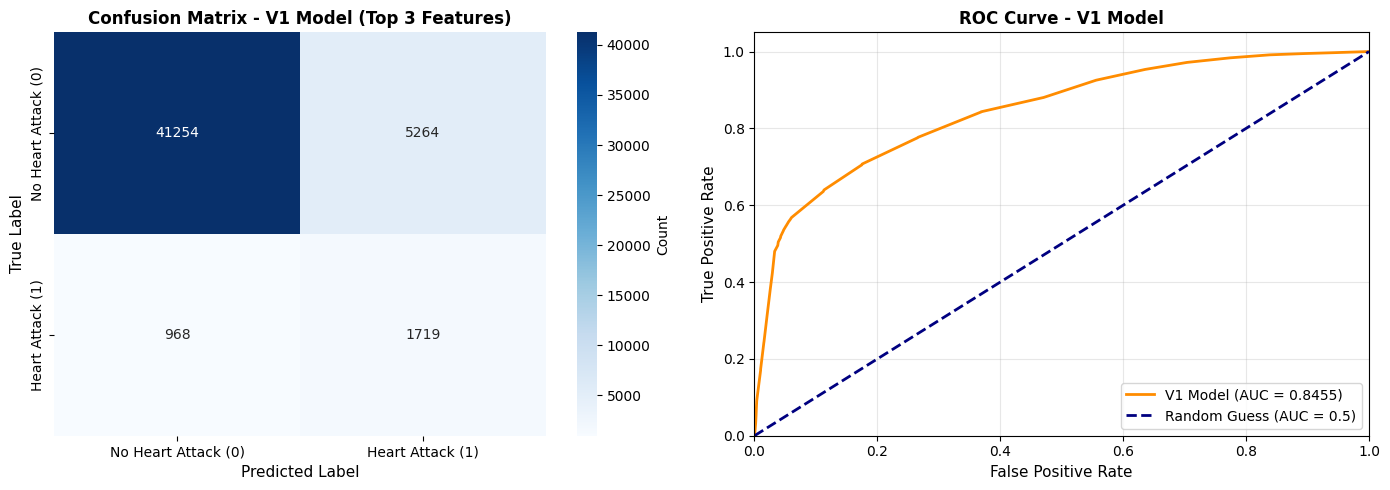


Confusion Matrix Breakdown:
True Negatives (TN):  41,254 - Correctly predicted NO heart attack
False Positives (FP): 5,264 - Incorrectly predicted heart attack
False Negatives (FN): 968 - Missed actual heart attacks
True Positives (TP):  1,719 - Correctly predicted heart attack


In [30]:
# Step 7: Plot confusion matrix and ROC curve
from sklearn.metrics import roc_curve, auc

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix
cm_v1 = confusion_matrix(y_test, y_pred_v1)
sns.heatmap(cm_v1, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Heart Attack (0)', 'Heart Attack (1)'],
            yticklabels=['No Heart Attack (0)', 'Heart Attack (1)'],
            cbar_kws={'label': 'Count'})
axes[0].set_title('Confusion Matrix - V1 Model (Top 3 Features)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=11)
axes[0].set_xlabel('Predicted Label', fontsize=11)

# ROC Curve
fpr_v1, tpr_v1, _ = roc_curve(y_test, y_pred_proba_v1)
roc_auc_v1 = auc(fpr_v1, tpr_v1)

axes[1].plot(fpr_v1, tpr_v1, color='darkorange', lw=2, 
             label=f'V1 Model (AUC = {roc_auc_v1:.4f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess (AUC = 0.5)')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate', fontsize=11)
axes[1].set_ylabel('True Positive Rate', fontsize=11)
axes[1].set_title('ROC Curve - V1 Model', fontsize=12, fontweight='bold')
axes[1].legend(loc="lower right")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nConfusion Matrix Breakdown:")
print(f"True Negatives (TN):  {cm_v1[0, 0]:,} - Correctly predicted NO heart attack")
print(f"False Positives (FP): {cm_v1[0, 1]:,} - Incorrectly predicted heart attack")
print(f"False Negatives (FN): {cm_v1[1, 0]:,} - Missed actual heart attacks")
print(f"True Positives (TP):  {cm_v1[1, 1]:,} - Correctly predicted heart attack")

In [31]:
# Step 8: Display feature coefficients to show importance
print("\n" + "="*60)
print("FEATURE COEFFICIENTS (Model Importance)")
print("="*60)

coefficients_v1 = model_v1.coef_[0]
intercept_v1 = model_v1.intercept_[0]

# Create coefficient dataframe
coef_df_v1 = pd.DataFrame({
    'Feature': top3_features,
    'Coefficient': coefficients_v1,
    'Abs_Coefficient': np.abs(coefficients_v1),
    'Odds_Ratio': np.exp(coefficients_v1)
}).sort_values('Abs_Coefficient', ascending=False)

print(f"\nIntercept: {intercept_v1:.4f}\n")
print(f"{'Feature':<30} {'Coefficient':>12} {'Odds Ratio':>12}")
print("-" * 60)
for _, row in coef_df_v1.iterrows():
    print(f"{row['Feature']:<30} {row['Coefficient']:>12.4f} {row['Odds_Ratio']:>12.4f}")

print("\n" + "="*60)
print("COEFFICIENT INTERPRETATION")
print("="*60)
print("• Positive coefficient → Increases odds of heart attack")
print("• Negative coefficient → Decreases odds of heart attack")
print("• Odds Ratio > 1 → Feature increases risk")
print("• Odds Ratio < 1 → Feature decreases risk")
print("• Larger |coefficient| → Stronger effect on prediction")


FEATURE COEFFICIENTS (Model Importance)

Intercept: -0.7962

Feature                         Coefficient   Odds Ratio
------------------------------------------------------------
AgeCategory                          0.7992       2.2237
HadAngina                            0.7152       2.0446
HadStroke                            0.3110       1.3648

COEFFICIENT INTERPRETATION
• Positive coefficient → Increases odds of heart attack
• Negative coefficient → Decreases odds of heart attack
• Odds Ratio > 1 → Feature increases risk
• Odds Ratio < 1 → Feature decreases risk
• Larger |coefficient| → Stronger effect on prediction


In [32]:
# Step 9: Statsmodels Logistic Regression (V1 - Statistical Inference)
import statsmodels.api as sm

print("="*70)
print("STATSMODELS LOGISTIC REGRESSION - V1 (Top 3 Features)")
print("="*70)
print("\nThis provides statistical inference including p-values and confidence intervals\n")

# Add constant (intercept) to the scaled features
X_train_v1_scaled_sm = sm.add_constant(X_train_v1_scaled)
X_test_v1_scaled_sm = sm.add_constant(X_test_v1_scaled)

# Fit statsmodels logistic regression
logit_model_v1 = sm.Logit(y_train, X_train_v1_scaled_sm)
logit_result_v1 = logit_model_v1.fit()

# Display the comprehensive summary table
print(logit_result_v1.summary())

# Extract and display key statistics
print("\n" + "="*70)
print("KEY STATISTICS INTERPRETATION")
print("="*70)
print(f"Pseudo R-squared: {logit_result_v1.prsquared:.4f}")
print(f"  → Measures model fit (higher is better, but typically lower than OLS R²)")
print(f"\nLog-Likelihood: {logit_result_v1.llf:.2f}")
print(f"  → Higher values indicate better fit")
print(f"\nAIC: {logit_result_v1.aic:.2f}")
print(f"BIC: {logit_result_v1.bic:.2f}")
print(f"  → Lower values indicate better model (useful for model comparison)")

# Display p-values with interpretation
print("\n" + "="*70)
print("STATISTICAL SIGNIFICANCE (P-VALUES)")
print("="*70)
feature_names = ['Intercept'] + top3_features
for name, pval in zip(feature_names, logit_result_v1.pvalues):
    sig = "***" if pval < 0.001 else "**" if pval < 0.01 else "*" if pval < 0.05 else "not significant"
    print(f"{name:<30} p-value: {pval:.4e}  {sig}")

print("\nSignificance levels: *** p<0.001, ** p<0.01, * p<0.05")

STATSMODELS LOGISTIC REGRESSION - V1 (Top 3 Features)

This provides statistical inference including p-values and confidence intervals

Optimization terminated successfully.
         Current function value: 0.155258
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         HadHeartAttack   No. Observations:               196817
Model:                          Logit   Df Residuals:                   196813
Method:                           MLE   Df Model:                            3
Date:                Wed, 03 Dec 2025   Pseudo R-squ.:                  0.2672
Time:                        23:52:17   Log-Likelihood:                -30557.
converged:                       True   LL-Null:                       -41699.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------

### Why Use AIC and BIC for Model Comparison?

**AIC (Akaike Information Criterion)** and **BIC (Bayesian Information Criterion)** are appropriate for comparing our logistic regression models because:

1. **Penalize Model Complexity**: Both metrics add a penalty term for the number of parameters, preventing overfitting
   - More features → higher penalty → helps avoid unnecessarily complex models

2. **Reward Goodness of Fit**: Both reward models that fit the data well (via log-likelihood)
   - Better predictions → lower AIC/BIC values

3. **Suitable for Nested Models**: Ideal for comparing models with different numbers of predictors
   - V1 (3 features) vs V2 (10 features) vs V3 (variable features)
   - All use the same logistic regression framework with different feature sets

4. **Balance Trade-offs**: Help identify the "sweet spot" between:
   - **Underfitting** (too few features, poor predictions)
   - **Overfitting** (too many features, doesn't generalize)

**Key Differences:**
- **AIC**: Less aggressive penalty, favors slightly more complex models
- **BIC**: Stronger penalty for complexity, favors simpler models (especially with large datasets)

**Interpretation**: Lower AIC/BIC = Better model. When comparing models, prefer the one with the lowest values.

In [33]:
# V1 Cross-Validation Analysis (Top 3 Features)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

print("=" * 70)
print("V1 MODEL - CROSS-VALIDATION ANALYSIS")
print("=" * 70)

# Safety checks
missing = []
for name in ["top3_features", "X_train_v1", "y_train"]:
    if name not in globals():
        missing.append(name)
if missing:
    raise ValueError(f"Missing prerequisite variables: {missing}. "
                     "Run the correlation + V1 feature selection cells first.")

v1_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(class_weight="balanced",
                                  max_iter=1000,
                                  random_state=42))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scoring_metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]
cv_results_v1 = {}

print("\nPerforming 5-Fold Cross-Validation on V1 (Top 3 Features)...\n")
for metric in cv_scoring_metrics:
    scores = cross_val_score(v1_pipeline, X_train_v1, y_train,
                             cv=cv, scoring=metric, n_jobs=-1)
    cv_results_v1[metric] = {
        "mean": scores.mean(),
        "std": scores.std(),
        "scores": scores
    }
    print(f"{metric.upper():12} Mean: {scores.mean():.4f}  "
          f"Std: {scores.std():.4f}  Folds: {[f'{s:.4f}' for s in scores]}")

print("\n" + "=" * 70)
print("CROSS-VALIDATION SUMMARY")
print("=" * 70)
roc_std = cv_results_v1["roc_auc"]["std"]
print(f"ROC-AUC Std Dev: {roc_std:.4f} "
      f"-> {'stable' if roc_std < 0.05 else 'variable'} performance")

V1 MODEL - CROSS-VALIDATION ANALYSIS

Performing 5-Fold Cross-Validation on V1 (Top 3 Features)...

ACCURACY     Mean: 0.8709  Std: 0.0018  Folds: ['0.8691', '0.8730', '0.8700', '0.8692', '0.8731']
PRECISION    Mean: 0.2449  Std: 0.0034  Folds: ['0.2413', '0.2492', '0.2458', '0.2405', '0.2475']
RECALL       Mean: 0.6546  Std: 0.0074  Folds: ['0.6512', '0.6586', '0.6673', '0.6473', '0.6488']
F1           Mean: 0.3564  Std: 0.0042  Folds: ['0.3522', '0.3616', '0.3592', '0.3507', '0.3583']
ROC_AUC      Mean: 0.8499  Std: 0.0036  Folds: ['0.8534', '0.8526', '0.8522', '0.8473', '0.8441']

CROSS-VALIDATION SUMMARY
ROC-AUC Std Dev: 0.0036 -> stable performance


## Step 6: V2 - Forward Selection Model (sklearn)

Build a more sophisticated logistic regression model using **sklearn's SequentialFeatureSelector** to systematically identify the optimal feature set through forward selection. This method starts with no features and iteratively adds the feature that most improves model performance using cross-validation.

In [50]:
# V2: sklearn SequentialFeatureSelector Forward Selection
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc)
import statsmodels.api as sm

print("="*70)
print("V2 - FORWARD SELECTION MODEL (sklearn SequentialFeatureSelector)")
print("="*70)

# Setup
estimator = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Forward selection - run once
print("\nRunning forward feature selection with cross-validation...")
sfs = SequentialFeatureSelector(
    estimator,
    direction='forward',
    scoring='roc_auc',
    cv=cv_strategy,
    n_jobs=-1
)

sfs.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[sfs.get_support()].tolist()

print(f"\n✓ Forward selection complete!")
print(f"\nSelected {len(selected_features)} features:")
for i, f in enumerate(selected_features, 1):
    print(f"{i:2d}. {f}")

# Fit final model on selected features
final_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])
final_pipeline.fit(X_train[selected_features], y_train)

# Predictions & probabilities
y_pred_v2 = final_pipeline.predict(X_test[selected_features])
y_proba_v2 = final_pipeline.predict_proba(X_test[selected_features])[:, 1]

# Calculate metrics
metrics = {
    'accuracy': accuracy_score(y_test, y_pred_v2),
    'precision': precision_score(y_test, y_pred_v2, zero_division=0),
    'recall': recall_score(y_test, y_pred_v2, zero_division=0),
    'f1': f1_score(y_test, y_pred_v2, zero_division=0),
    'roc_auc': roc_auc_score(y_test, y_proba_v2)
}

print("\n" + "="*70)
print("V2 MODEL PERFORMANCE METRICS (Forward Selection)")
print("="*70)
for k, v in metrics.items():
    print(f"{k.capitalize():<10}: {v:.4f}")

print("\n" + "="*70)
print("CLASSIFICATION REPORT")
print("="*70)
print(classification_report(y_test, y_pred_v2, 
                          target_names=['No Heart Attack (0)', 'Heart Attack (1)'],
                          zero_division=0))

V2 - FORWARD SELECTION MODEL (sklearn SequentialFeatureSelector)

Running forward feature selection with cross-validation...

✓ Forward selection complete!

Selected 19 features:
 1. Sex
 2. PhysicalHealthDays
 3. LastCheckupTime
 4. PhysicalActivities
 5. RemovedTeeth
 6. HadAngina
 7. HadStroke
 8. HadCOPD
 9. HadKidneyDisease
10. HadDiabetes
11. DeafOrHardOfHearing
12. BlindOrVisionDifficulty
13. DifficultyConcentrating
14. DifficultyWalking
15. SmokerStatus
16. ChestScan
17. AgeCategory
18. AlcoholDrinkers
19. FluVaxLast12

V2 MODEL PERFORMANCE METRICS (Forward Selection)
Accuracy  : 0.8345
Precision : 0.2136
Recall    : 0.7570
F1        : 0.3332
Roc_auc   : 0.8816

CLASSIFICATION REPORT
                     precision    recall  f1-score   support

No Heart Attack (0)       0.98      0.84      0.91     46518
   Heart Attack (1)       0.21      0.76      0.33      2687

           accuracy                           0.83     49205
          macro avg       0.60      0.80      0.62   

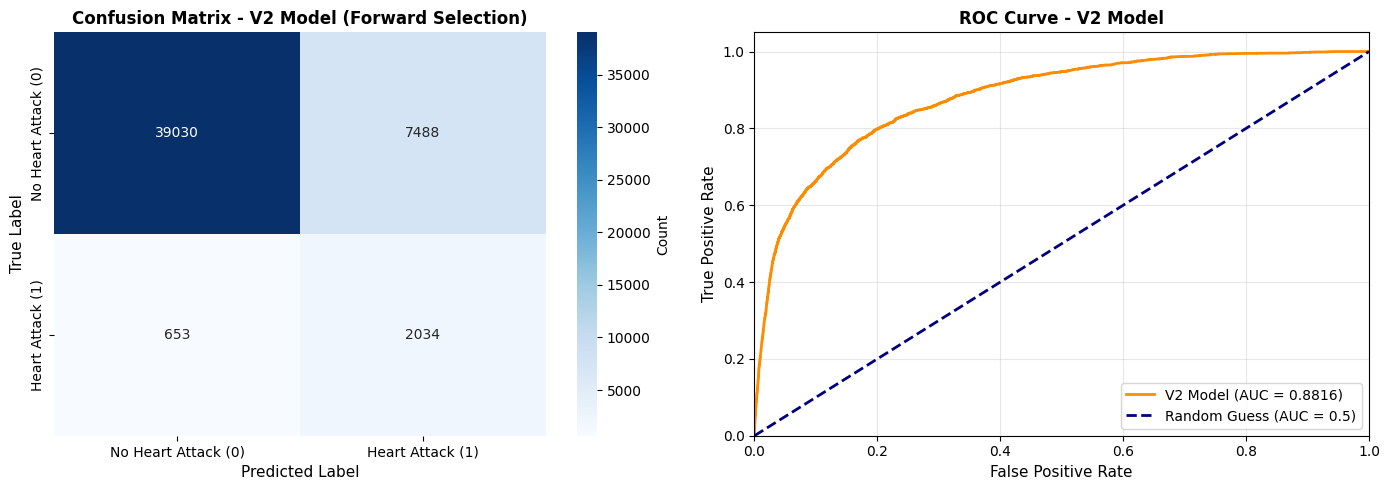


Confusion Matrix Breakdown:
True Negatives (TN):  39,030 - Correctly predicted NO heart attack
False Positives (FP): 7,488 - Incorrectly predicted heart attack
False Negatives (FN): 653 - Missed actual heart attacks
True Positives (TP):  2,034 - Correctly predicted heart attack


In [51]:
# V2 Visualization: Confusion Matrix and ROC Curve
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix
cm_v2 = confusion_matrix(y_test, y_pred_v2)
sns.heatmap(cm_v2, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Heart Attack (0)', 'Heart Attack (1)'],
            yticklabels=['No Heart Attack (0)', 'Heart Attack (1)'],
            cbar_kws={'label': 'Count'})
axes[0].set_title('Confusion Matrix - V2 Model (Forward Selection)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=11)
axes[0].set_xlabel('Predicted Label', fontsize=11)

# ROC Curve
fpr_v2, tpr_v2, _ = roc_curve(y_test, y_proba_v2)
roc_auc_v2 = auc(fpr_v2, tpr_v2)

axes[1].plot(fpr_v2, tpr_v2, color='darkorange', lw=2, 
             label=f'V2 Model (AUC = {roc_auc_v2:.4f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess (AUC = 0.5)')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate', fontsize=11)
axes[1].set_ylabel('True Positive Rate', fontsize=11)
axes[1].set_title('ROC Curve - V2 Model', fontsize=12, fontweight='bold')
axes[1].legend(loc="lower right")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nConfusion Matrix Breakdown:")
print(f"True Negatives (TN):  {cm_v2[0, 0]:,} - Correctly predicted NO heart attack")
print(f"False Positives (FP): {cm_v2[0, 1]:,} - Incorrectly predicted heart attack")
print(f"False Negatives (FN): {cm_v2[1, 0]:,} - Missed actual heart attacks")
print(f"True Positives (TP):  {cm_v2[1, 1]:,} - Correctly predicted heart attack")

In [52]:
# V2 Statsmodels Analysis (AIC/BIC/P-values)
print("="*70)
print("STATSMODELS LOGISTIC REGRESSION - V2 (Forward Selection)")
print("="*70)
print("\nProvides statistical inference including p-values and AIC/BIC\n")

# Scale features for statsmodels
scaler_v2 = StandardScaler()
X_train_v2_scaled = scaler_v2.fit_transform(X_train[selected_features])
X_test_v2_scaled = scaler_v2.transform(X_test[selected_features])

# Add constant (intercept)
X_train_v2_scaled_sm = sm.add_constant(X_train_v2_scaled)

# Fit statsmodels logistic regression
logit_model_v2 = sm.Logit(y_train, X_train_v2_scaled_sm)
logit_result_v2 = logit_model_v2.fit()

# Display summary
print(logit_result_v2.summary())

# Extract and display key statistics
print("\n" + "="*70)
print("KEY STATISTICS")
print("="*70)
print(f"Pseudo R-squared: {logit_result_v2.prsquared:.4f}")
print(f"Log-Likelihood: {logit_result_v2.llf:.2f}")
print(f"AIC: {logit_result_v2.aic:.2f}")
print(f"BIC: {logit_result_v2.bic:.2f}")

# Display p-values
print("\n" + "="*70)
print("STATISTICAL SIGNIFICANCE (P-VALUES)")
print("="*70)
feature_names = ['Intercept'] + selected_features
for name, pval in zip(feature_names, logit_result_v2.pvalues):
    sig = "***" if pval < 0.001 else "**" if pval < 0.01 else "*" if pval < 0.05 else "not significant"
    print(f"{name:<35} p-value: {pval:.4e}  {sig}")

print("\nSignificance levels: *** p<0.001, ** p<0.01, * p<0.05")

STATSMODELS LOGISTIC REGRESSION - V2 (Forward Selection)

Provides statistical inference including p-values and AIC/BIC

Optimization terminated successfully.
         Current function value: 0.146665
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         HadHeartAttack   No. Observations:               196817
Model:                          Logit   Df Residuals:                   196797
Method:                           MLE   Df Model:                           19
Date:                Thu, 04 Dec 2025   Pseudo R-squ.:                  0.3078
Time:                        00:01:40   Log-Likelihood:                -28866.
converged:                       True   LL-Null:                       -41699.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------

In [53]:
# V2 Cross-Validation Analysis
from sklearn.model_selection import cross_val_score

print("=" * 70)
print("V2 MODEL - CROSS-VALIDATION ANALYSIS")
print("=" * 70)

# Create pipeline for V2
v2_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

# 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Calculate multiple metrics via cross-validation
cv_results_v2 = {}

print(f"\nPerforming 5-Fold Cross-Validation on V2 ({len(selected_features)} Features)...\n")

for metric in cv_scoring_metrics:
    scores = cross_val_score(v2_pipeline, X_train[selected_features], y_train, cv=cv, scoring=metric, n_jobs=-1)
    cv_results_v2[metric] = {
        'mean': scores.mean(),
        'std': scores.std(),
        'scores': scores
    }
    print(f"{metric.upper():12} - Mean: {scores.mean():.4f} (±{scores.std():.4f})")
    print(f"             Fold scores: {[f'{s:.4f}' for s in scores]}")

print("\n" + "=" * 70)
print("CROSS-VALIDATION SUMMARY")
print("=" * 70)
print(f"The model shows {'consistent' if cv_results_v2['roc_auc']['std'] < 0.05 else 'variable'} performance across folds")
print(f"ROC-AUC std dev: {cv_results_v2['roc_auc']['std']:.4f}")

V2 MODEL - CROSS-VALIDATION ANALYSIS

Performing 5-Fold Cross-Validation on V2 (19 Features)...

ACCURACY     - Mean: 0.8341 (±0.0019)
             Fold scores: ['0.8373', '0.8342', '0.8314', '0.8342', '0.8335']
PRECISION    - Mean: 0.2138 (±0.0026)
             Fold scores: ['0.2180', '0.2154', '0.2109', '0.2117', '0.2128']
RECALL       - Mean: 0.7608 (±0.0074)
             Fold scores: ['0.7647', '0.7707', '0.7613', '0.7483', '0.7591']
F1           - Mean: 0.3338 (±0.0037)
             Fold scores: ['0.3393', '0.3368', '0.3303', '0.3300', '0.3325']
ROC_AUC      - Mean: 0.8866 (±0.0021)
             Fold scores: ['0.8886', '0.8893', '0.8866', '0.8848', '0.8838']

CROSS-VALIDATION SUMMARY
The model shows consistent performance across folds
ROC-AUC std dev: 0.0021


## Step 7: V3 - Lasso (L1 Regularized) Logistic Regression

Build a logistic regression model using **L1 regularization (Lasso)** which automatically performs feature selection by shrinking less important feature coefficients to zero. Unlike V2's forward selection which iteratively adds features, Lasso simultaneously fits all features while penalizing their magnitudes, effectively selecting the most important ones.

In [55]:
# V3: Lasso (L1 Regularized) Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

print("="*70)
print("V3 - LASSO (L1 REGULARIZED) LOGISTIC REGRESSION")
print("="*70)
print("\nLasso uses L1 regularization to automatically select important features")
print("by shrinking less relevant feature coefficients to exactly zero.\n")

# Step 1: Use ALL features (not a subset)
print(f"Using all {X_train.shape[1]} features from the dataset")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")

# Step 2: Setup pipeline with scaling and Lasso logistic regression
# Note: solver='saga' supports L1 penalty, liblinear also works but saga is faster for large datasets
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', LogisticRegression(
        penalty='l1',
        solver='saga',
        class_weight='balanced',
        max_iter=5000,
        random_state=42
    ))
])

# Step 3: Tune regularization parameter C using GridSearchCV
# Smaller C = stronger regularization (more coefficients → 0)
# Larger C = weaker regularization (more features retained)
param_grid = {
    'lasso__C': [0.001, 0.01, 0.1, 1, 10]
}

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("\n" + "="*70)
print("HYPERPARAMETER TUNING - Finding Best C Value")
print("="*70)
print("\nTesting C values: [0.001, 0.01, 0.1, 1, 10]")
print("(Lower C = stronger regularization = fewer features selected)")
print("\nPerforming 5-fold cross-validation with ROC-AUC scoring...")

grid_search = GridSearchCV(
    lasso_pipeline,
    param_grid,
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"\n✓ Hyperparameter tuning complete!")
print(f"\nBest C value: {grid_search.best_params_['lasso__C']}")
print(f"Best cross-validation ROC-AUC: {grid_search.best_score_:.4f}")

# Display results for all C values
print("\n" + "="*70)
print("CROSS-VALIDATION RESULTS FOR ALL C VALUES")
print("="*70)
cv_results_df = pd.DataFrame(grid_search.cv_results_)
for idx, row in cv_results_df.iterrows():
    c_val = row['param_lasso__C']
    mean_score = row['mean_test_score']
    std_score = row['std_test_score']
    print(f"C = {c_val:6.3f}  →  ROC-AUC: {mean_score:.4f} (±{std_score:.4f})")

# Step 4: Get the best model
best_lasso_model = grid_search.best_estimator_
best_C = grid_search.best_params_['lasso__C']

print(f"\n✓ Best model selected with C = {best_C}")

V3 - LASSO (L1 REGULARIZED) LOGISTIC REGRESSION

Lasso uses L1 regularization to automatically select important features
by shrinking less relevant feature coefficients to exactly zero.

Using all 39 features from the dataset
X_train shape: (196817, 39)
X_test shape:  (49205, 39)

HYPERPARAMETER TUNING - Finding Best C Value

Testing C values: [0.001, 0.01, 0.1, 1, 10]
(Lower C = stronger regularization = fewer features selected)

Performing 5-fold cross-validation with ROC-AUC scoring...
Fitting 5 folds for each of 5 candidates, totalling 25 fits

✓ Hyperparameter tuning complete!

Best C value: 0.001
Best cross-validation ROC-AUC: 0.8406

CROSS-VALIDATION RESULTS FOR ALL C VALUES
C =  0.001  →  ROC-AUC: 0.8406 (±0.0019)
C =  0.010  →  ROC-AUC: 0.8336 (±0.0016)
C =  0.100  →  ROC-AUC: 0.8327 (±0.0015)
C =  1.000  →  ROC-AUC: 0.8326 (±0.0014)
C = 10.000  →  ROC-AUC: 0.8326 (±0.0014)

✓ Best model selected with C = 0.001


In [56]:
# V3: Feature Selection Analysis - Which features did Lasso keep?
print("\n" + "="*70)
print("LASSO FEATURE SELECTION RESULTS")
print("="*70)

# Get the Lasso model from the pipeline
lasso_model = best_lasso_model.named_steps['lasso']
scaler = best_lasso_model.named_steps['scaler']

# Get coefficients
lasso_coefficients = lasso_model.coef_[0]
feature_names = X_train.columns

# Separate zero and non-zero coefficients
non_zero_mask = lasso_coefficients != 0
zero_mask = lasso_coefficients == 0

non_zero_features = feature_names[non_zero_mask].tolist()
zero_features = feature_names[zero_mask].tolist()
non_zero_coefs = lasso_coefficients[non_zero_mask]

print(f"\nTotal features: {len(feature_names)}")
print(f"Features SELECTED (non-zero coefficients): {len(non_zero_features)}")
print(f"Features ELIMINATED (zero coefficients): {len(zero_features)}")

print(f"\n{'='*70}")
print(f"SELECTED FEATURES (Sorted by Absolute Coefficient Value)")
print(f"{'='*70}")

# Create dataframe of selected features
selected_coef_df = pd.DataFrame({
    'Feature': non_zero_features,
    'Coefficient': non_zero_coefs,
    'Abs_Coefficient': np.abs(non_zero_coefs),
    'Odds_Ratio': np.exp(non_zero_coefs)
}).sort_values('Abs_Coefficient', ascending=False)

for i, row in selected_coef_df.iterrows():
    print(f"{row['Feature']:<40} coef: {row['Coefficient']:>8.4f}  |  OR: {row['Odds_Ratio']:>8.4f}")

print(f"\n{'='*70}")
print(f"ELIMINATED FEATURES (Coefficient = 0)")
print(f"{'='*70}")
if len(zero_features) > 0:
    for i, feat in enumerate(zero_features, 1):
        print(f"{i:2d}. {feat}")
else:
    print("No features were eliminated (all have non-zero coefficients)")

# Store selected features for later comparison
lasso_selected_features = non_zero_features
print(f"\n✓ Lasso selected {len(lasso_selected_features)} features out of {len(feature_names)} total")


LASSO FEATURE SELECTION RESULTS

Total features: 39
Features SELECTED (non-zero coefficients): 27
Features ELIMINATED (zero coefficients): 12

SELECTED FEATURES (Sorted by Absolute Coefficient Value)
AgeCategory                              coef:   0.6305  |  OR:   1.8786
HadAngina                                coef:   0.6177  |  OR:   1.8546
ChestScan                                coef:   0.3386  |  OR:   1.4030
Sex                                      coef:   0.2881  |  OR:   1.3339
HadStroke                                coef:   0.2088  |  OR:   1.2322
SmokerStatus                             coef:  -0.1846  |  OR:   0.8315
HadDiabetes                              coef:   0.1606  |  OR:   1.1743
AlcoholDrinkers                          coef:  -0.1189  |  OR:   0.8879
DifficultyWalking                        coef:   0.0842  |  OR:   1.0879
PhysicalHealthDays                       coef:   0.0696  |  OR:   1.0721
HadCOPD                                  coef:   0.0617  |  OR:   1.0

In [57]:
# V3: Model Evaluation - Calculate metrics
print("\n" + "="*70)
print("V3 MODEL PERFORMANCE EVALUATION")
print("="*70)

# Predictions
y_pred_v3 = best_lasso_model.predict(X_test)
y_proba_v3 = best_lasso_model.predict_proba(X_test)[:, 1]

# Calculate metrics
v3_accuracy = accuracy_score(y_test, y_pred_v3)
v3_precision = precision_score(y_test, y_pred_v3, zero_division=0)
v3_recall = recall_score(y_test, y_pred_v3, zero_division=0)
v3_f1 = f1_score(y_test, y_pred_v3, zero_division=0)
v3_auc = roc_auc_score(y_test, y_proba_v3)

# Store metrics for comparison
metrics_v3 = {
    'accuracy': v3_accuracy,
    'precision': v3_precision,
    'recall': v3_recall,
    'f1': v3_f1,
    'roc_auc': v3_auc
}

print("\nTest Set Performance Metrics:")
print(f"{'Metric':<15} {'Score':>10}")
print("-" * 27)
print(f"{'Accuracy':<15} {v3_accuracy:>10.4f}")
print(f"{'Precision':<15} {v3_precision:>10.4f}")
print(f"{'Recall':<15} {v3_recall:>10.4f}")
print(f"{'F1-Score':<15} {v3_f1:>10.4f}")
print(f"{'ROC-AUC':<15} {v3_auc:>10.4f}")

print("\n" + "="*70)
print("CLASSIFICATION REPORT")
print("="*70)
print(classification_report(y_test, y_pred_v3,
                          target_names=['No Heart Attack (0)', 'Heart Attack (1)'],
                          zero_division=0))

print("\n" + "="*70)
print("QUICK COMPARISON WITH V1 AND V2")
print("="*70)
print(f"{'Model':<20} {'ROC-AUC':>12} {'Recall':>12} {'Features':>12}")
print("-" * 58)
print(f"{'V1 (Top 3)':<20} {v1_auc:>12.4f} {v1_recall:>12.4f} {len(top3_features):>12}")
print(f"{'V2 (Forward Sel.)':<20} {metrics['roc_auc']:>12.4f} {metrics['recall']:>12.4f} {len(selected_features):>12}")
print(f"{'V3 (Lasso)':<20} {v3_auc:>12.4f} {v3_recall:>12.4f} {len(lasso_selected_features):>12}")
print(f"\n{'Best performer:':<20} ", end='')
best_model = max([('V1', v1_auc), ('V2', metrics['roc_auc']), ('V3', v3_auc)], key=lambda x: x[1])
print(f"{best_model[0]} with ROC-AUC = {best_model[1]:.4f}")


V3 MODEL PERFORMANCE EVALUATION

Test Set Performance Metrics:
Metric               Score
---------------------------
Accuracy            0.8397
Precision           0.2177
Recall              0.7462
F1-Score            0.3371
ROC-AUC             0.8820

CLASSIFICATION REPORT
                     precision    recall  f1-score   support

No Heart Attack (0)       0.98      0.85      0.91     46518
   Heart Attack (1)       0.22      0.75      0.34      2687

           accuracy                           0.84     49205
          macro avg       0.60      0.80      0.62     49205
       weighted avg       0.94      0.84      0.88     49205


QUICK COMPARISON WITH V1 AND V2
Model                     ROC-AUC       Recall     Features
----------------------------------------------------------
V1 (Top 3)                 0.8455       0.6397            3
V2 (Forward Sel.)          0.8816       0.7570           19
V3 (Lasso)                 0.8820       0.7462           27

Best performer:      

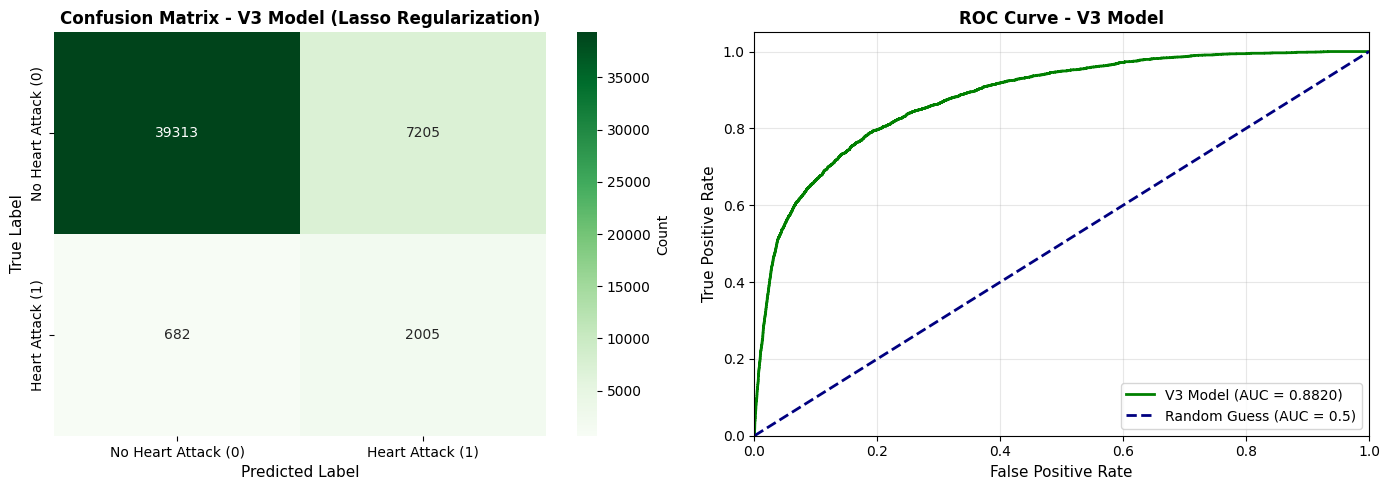


Confusion Matrix Breakdown:
True Negatives (TN):  39,313 - Correctly predicted NO heart attack
False Positives (FP): 7,205 - Incorrectly predicted heart attack
False Negatives (FN): 682 - Missed actual heart attacks
True Positives (TP):  2,005 - Correctly predicted heart attack


In [58]:
# V3 Visualization: Confusion Matrix and ROC Curve
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix
cm_v3 = confusion_matrix(y_test, y_pred_v3)
sns.heatmap(cm_v3, annot=True, fmt='d', cmap='Greens', ax=axes[0],
            xticklabels=['No Heart Attack (0)', 'Heart Attack (1)'],
            yticklabels=['No Heart Attack (0)', 'Heart Attack (1)'],
            cbar_kws={'label': 'Count'})
axes[0].set_title('Confusion Matrix - V3 Model (Lasso Regularization)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=11)
axes[0].set_xlabel('Predicted Label', fontsize=11)

# ROC Curve
fpr_v3, tpr_v3, _ = roc_curve(y_test, y_proba_v3)
roc_auc_v3 = auc(fpr_v3, tpr_v3)

axes[1].plot(fpr_v3, tpr_v3, color='green', lw=2, 
             label=f'V3 Model (AUC = {roc_auc_v3:.4f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess (AUC = 0.5)')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate', fontsize=11)
axes[1].set_ylabel('True Positive Rate', fontsize=11)
axes[1].set_title('ROC Curve - V3 Model', fontsize=12, fontweight='bold')
axes[1].legend(loc="lower right")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nConfusion Matrix Breakdown:")
print(f"True Negatives (TN):  {cm_v3[0, 0]:,} - Correctly predicted NO heart attack")
print(f"False Positives (FP): {cm_v3[0, 1]:,} - Incorrectly predicted heart attack")
print(f"False Negatives (FN): {cm_v3[1, 0]:,} - Missed actual heart attacks")
print(f"True Positives (TP):  {cm_v3[1, 1]:,} - Correctly predicted heart attack")

In [59]:
# V3: Cross-Validation Analysis
print("=" * 70)
print("V3 MODEL - CROSS-VALIDATION ANALYSIS")
print("=" * 70)

# Use the best pipeline from grid search for consistent CV analysis
best_pipeline = grid_search.best_estimator_

# 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Calculate multiple metrics via cross-validation
cv_results_v3 = {}

print(f"\nPerforming 5-Fold Cross-Validation on V3 (Lasso with C={best_C})...\n")

for metric in cv_scoring_metrics:
    scores = cross_val_score(best_pipeline, X_train, y_train, cv=cv, scoring=metric, n_jobs=-1)
    cv_results_v3[metric] = {
        'mean': scores.mean(),
        'std': scores.std(),
        'scores': scores
    }
    print(f"{metric.upper():12} - Mean: {scores.mean():.4f} (±{scores.std():.4f})")
    print(f"             Fold scores: {[f'{s:.4f}' for s in scores]}")

print("\n" + "=" * 70)
print("CROSS-VALIDATION SUMMARY")
print("=" * 70)
print(f"The model shows {'consistent' if cv_results_v3['roc_auc']['std'] < 0.05 else 'variable'} performance across folds")
print(f"ROC-AUC std dev: {cv_results_v3['roc_auc']['std']:.4f}")

V3 MODEL - CROSS-VALIDATION ANALYSIS

Performing 5-Fold Cross-Validation on V3 (Lasso with C=0.001)...

ACCURACY     - Mean: 0.8406 (±0.0019)
             Fold scores: ['0.8438', '0.8409', '0.8380', '0.8397', '0.8408']
PRECISION    - Mean: 0.2194 (±0.0027)
             Fold scores: ['0.2239', '0.2207', '0.2166', '0.2170', '0.2190']
RECALL       - Mean: 0.7499 (±0.0053)
             Fold scores: ['0.7544', '0.7558', '0.7515', '0.7417', '0.7460']
F1           - Mean: 0.3395 (±0.0036)
             Fold scores: ['0.3453', '0.3416', '0.3362', '0.3357', '0.3386']
ROC_AUC      - Mean: 0.8866 (±0.0022)
             Fold scores: ['0.8891', '0.8888', '0.8870', '0.8845', '0.8837']

CROSS-VALIDATION SUMMARY
The model shows consistent performance across folds
ROC-AUC std dev: 0.0022


In [60]:
# V3: Feature Selection Comparison - Lasso vs Forward Selection
print("="*70)
print("FEATURE SELECTION COMPARISON: V2 (Forward) vs V3 (Lasso)")
print("="*70)

print(f"\nV2 Forward Selection: {len(selected_features)} features")
print(f"V3 Lasso Regularization: {len(lasso_selected_features)} features")

# Find overlapping features
v2_features_set = set(selected_features)
v3_features_set = set(lasso_selected_features)

common_features = v2_features_set.intersection(v3_features_set)
v2_only = v2_features_set - v3_features_set
v3_only = v3_features_set - v2_features_set

print(f"\n{'='*70}")
print(f"FEATURE OVERLAP ANALYSIS")
print(f"{'='*70}")
print(f"\nFeatures selected by BOTH methods: {len(common_features)}")
if len(common_features) > 0:
    for i, feat in enumerate(sorted(common_features), 1):
        print(f"  {i:2d}. {feat}")

print(f"\nFeatures selected ONLY by V2 (Forward Selection): {len(v2_only)}")
if len(v2_only) > 0:
    for i, feat in enumerate(sorted(v2_only), 1):
        print(f"  {i:2d}. {feat}")

print(f"\nFeatures selected ONLY by V3 (Lasso): {len(v3_only)}")
if len(v3_only) > 0:
    for i, feat in enumerate(sorted(v3_only), 1):
        print(f"  {i:2d}. {feat}")

# Calculate overlap percentage
if len(selected_features) > 0 and len(lasso_selected_features) > 0:
    overlap_pct = (len(common_features) / min(len(selected_features), len(lasso_selected_features))) * 100
    print(f"\nFeature overlap: {overlap_pct:.1f}% (relative to smaller feature set)")

print(f"\n{'='*70}")
print(f"INTERPRETATION")
print(f"{'='*70}")
print("\nForward Selection (V2):")
print("  • Iteratively adds features that improve cross-validated performance")
print("  • Considers feature interactions during selection")
print("  • Stops at predefined number of features")
print("  • More computationally intensive")

print("\nLasso Regularization (V3):")
print("  • Simultaneously considers all features")
print("  • Shrinks less important coefficients to exactly zero")
print("  • Number of features depends on regularization strength (C)")
print("  • Faster computation, automatic feature selection")

if overlap_pct > 70:
    print(f"\n✓ High overlap ({overlap_pct:.1f}%) suggests both methods identify")
    print("  similar important features for heart attack prediction")
elif overlap_pct > 40:
    print(f"\n⚠️  Moderate overlap ({overlap_pct:.1f}%) indicates some agreement")
    print("  but different selection criteria lead to different feature sets")
else:
    print(f"\n⚠️  Low overlap ({overlap_pct:.1f}%) suggests the two methods")
    print("  identify quite different feature sets - investigate further")

FEATURE SELECTION COMPARISON: V2 (Forward) vs V3 (Lasso)

V2 Forward Selection: 19 features
V3 Lasso Regularization: 27 features

FEATURE OVERLAP ANALYSIS

Features selected by BOTH methods: 19
   1. AgeCategory
   2. AlcoholDrinkers
   3. BlindOrVisionDifficulty
   4. ChestScan
   5. DeafOrHardOfHearing
   6. DifficultyConcentrating
   7. DifficultyWalking
   8. FluVaxLast12
   9. HadAngina
  10. HadCOPD
  11. HadDiabetes
  12. HadKidneyDisease
  13. HadStroke
  14. LastCheckupTime
  15. PhysicalActivities
  16. PhysicalHealthDays
  17. RemovedTeeth
  18. Sex
  19. SmokerStatus

Features selected ONLY by V2 (Forward Selection): 0

Features selected ONLY by V3 (Lasso): 8
   1. BMI
   2. DifficultyErrands
   3. GeneralHealth
   4. HadArthritis
   5. HadDepressiveDisorder
   6. MentalHealthDays
   7. PneumoVaxEver
   8. SleepHours

Feature overlap: 100.0% (relative to smaller feature set)

INTERPRETATION

Forward Selection (V2):
  • Iteratively adds features that improve cross-validated 

## Final Model Comparison: V1 vs V2 vs V3

Comprehensive comparison of all three models with performance metrics, complexity analysis, and recommendations.

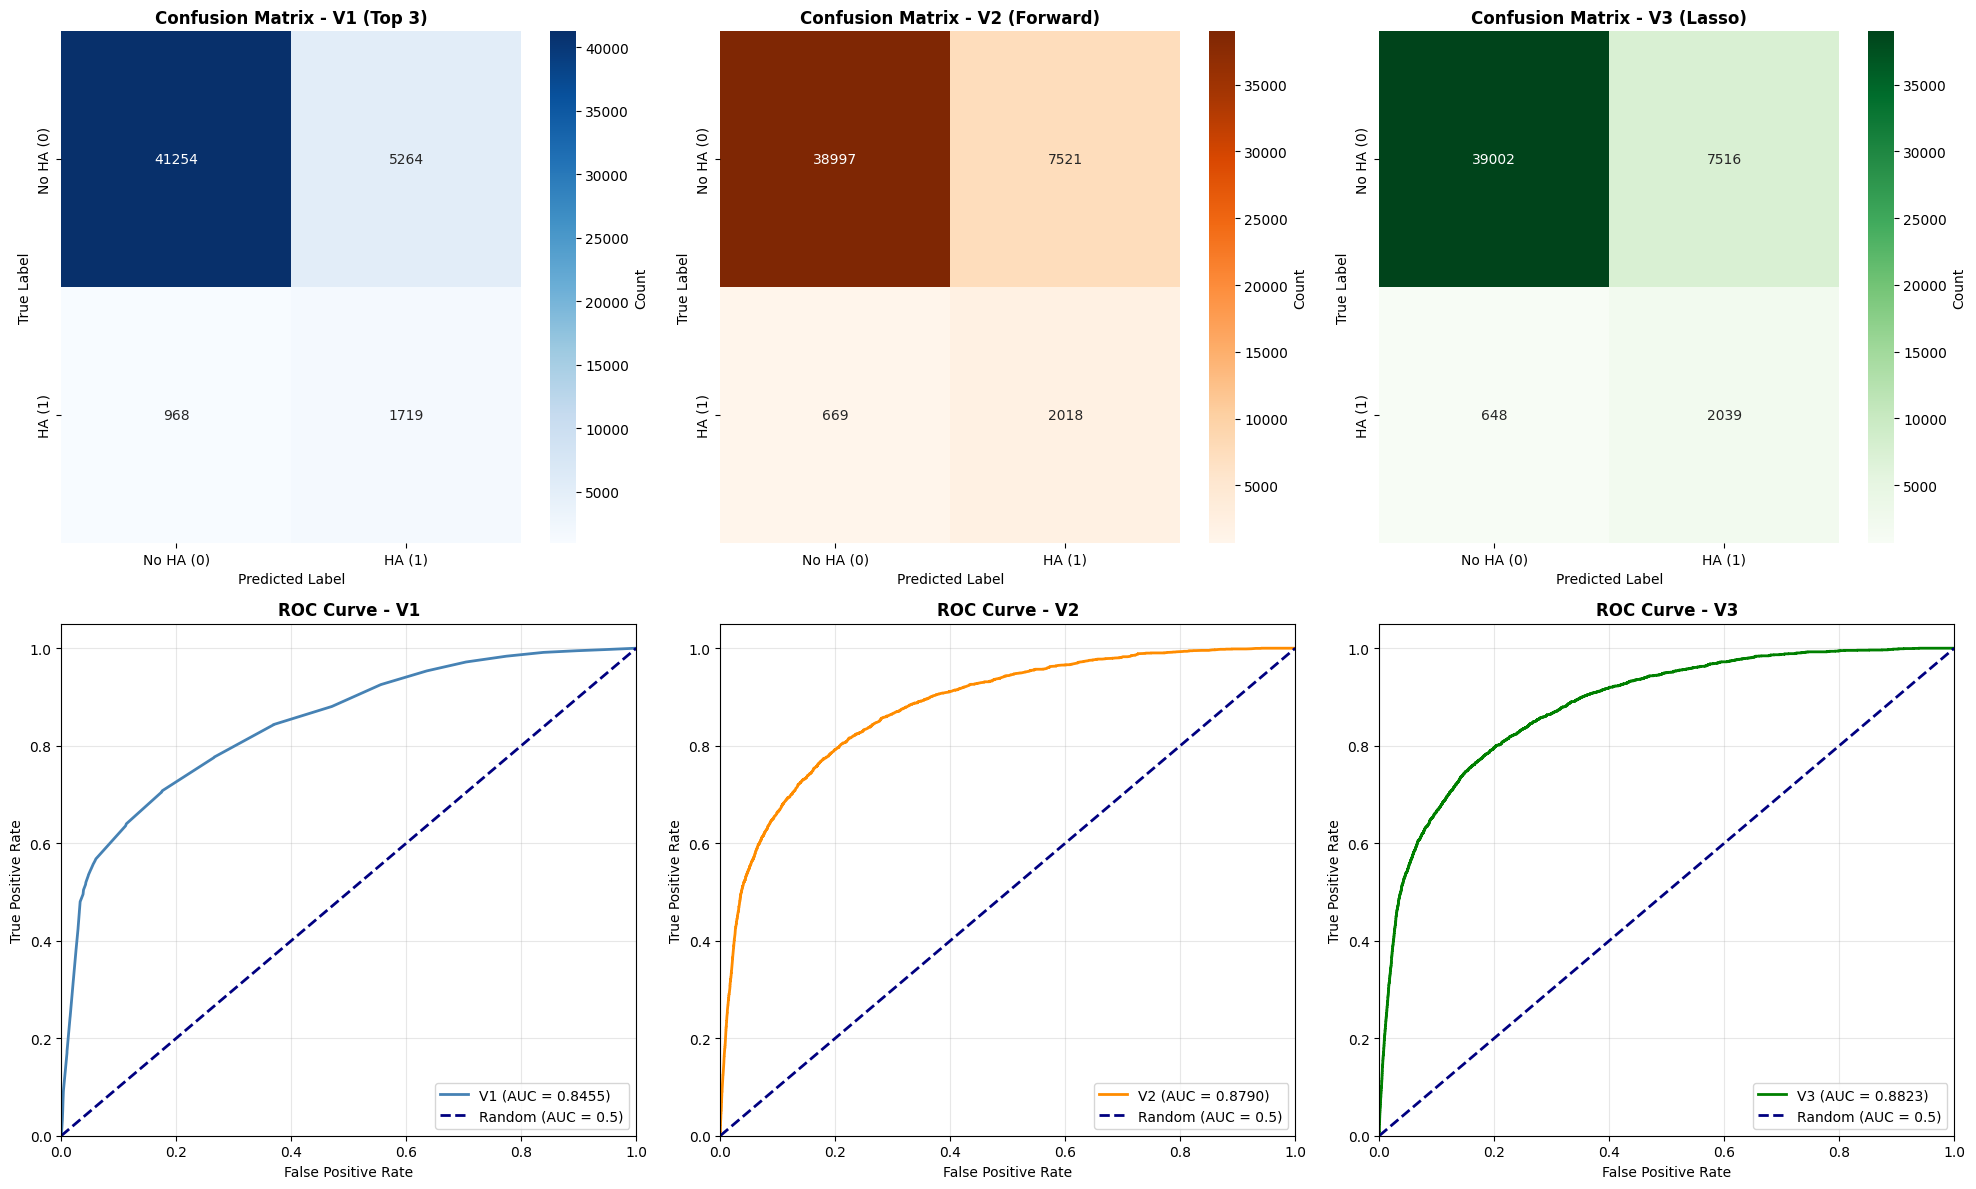

MODEL COMPARISON SUMMARY

V1 (Top 3) Model:
  TN: 41,254  |  FP: 5,264  |  FN: 968  |  TP: 1,719
  Captured 1,719 out of 2,687 heart attacks (Recall: 0.6397)

V2 (Forward) Model:
  TN: 38,997  |  FP: 7,521  |  FN: 669  |  TP: 2,018
  Captured 2,018 out of 2,687 heart attacks (Recall: 0.7510)

V3 (Lasso) Model:
  TN: 39,002  |  FP: 7,516  |  FN: 648  |  TP: 2,039
  Captured 2,039 out of 2,687 heart attacks (Recall: 0.7588)

KEY INSIGHT: Compare how many true heart attacks (TP) each model catches!


In [ ]:
# Visual Comparison: V1 vs V2 vs V3 - All Models Side-by-Side
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Row 1: Confusion Matrices
models_cm = [
    ('V1 (Top 3)', confusion_matrix(y_test, y_pred_v1), 'Blues'),
    ('V2 (Forward)', confusion_matrix(y_test, y_pred_v2), 'Oranges'),
    ('V3 (Lasso)', confusion_matrix(y_test, y_pred_v3), 'Greens')
]

for idx, (model_name, cm, cmap) in enumerate(models_cm):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, ax=axes[0, idx],
                xticklabels=['No HA (0)', 'HA (1)'],
                yticklabels=['No HA (0)', 'HA (1)'],
                cbar_kws={'label': 'Count'})
    axes[0, idx].set_title(f'Confusion Matrix - {model_name}', fontsize=12, fontweight='bold')
    axes[0, idx].set_ylabel('True Label', fontsize=10)
    axes[0, idx].set_xlabel('Predicted Label', fontsize=10)

# Row 2: ROC Curves
models_roc = [
    ('V1', y_pred_proba_v1, 'steelblue'),
    ('V2', y_proba_v2, 'darkorange'),
    ('V3', y_proba_v3, 'green')
]

for idx, (model_name, y_proba, color) in enumerate(models_roc):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    axes[1, idx].plot(fpr, tpr, color=color, lw=2, 
                     label=f'{model_name} (AUC = {roc_auc:.4f})')
    axes[1, idx].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
                     label='Random (AUC = 0.5)')
    axes[1, idx].set_xlim([0.0, 1.0])
    axes[1, idx].set_ylim([0.0, 1.05])
    axes[1, idx].set_xlabel('False Positive Rate', fontsize=10)
    axes[1, idx].set_ylabel('True Positive Rate', fontsize=10)
    axes[1, idx].set_title(f'ROC Curve - {model_name}', fontsize=12, fontweight='bold')
    axes[1, idx].legend(loc="lower right")
    axes[1, idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("="*90)
print("MODEL COMPARISON SUMMARY")
print("="*90)
for idx, (model_name, cm, _) in enumerate(models_cm):
    print(f"\n{model_name} Model:")
    print(f"  TN: {cm[0, 0]:,}  |  FP: {cm[0, 1]:,}  |  FN: {cm[1, 0]:,}  |  TP: {cm[1, 1]:,}")
    recall = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    precision = cm[1, 1] / (cm[0, 1] + cm[1, 1]) if (cm[0, 1] + cm[1, 1]) > 0 else 0
    print(f"  Captured {cm[1, 1]:,} out of {cm[1, 0] + cm[1, 1]:,} heart attacks (Recall: {recall:.4f})")
    
print(f"\n{'='*90}")
print("KEY INSIGHT: Compare how many true heart attacks (TP) each model catches!")

## Cross-Validation Performance Summary

**Explicit CV Error Comparison (5-Fold Cross-Validation ROC-AUC):**

The cross-validation results provide an unbiased estimate of model performance on unseen data:

- **V1 (Top 3 Features)**: CV ROC-AUC = 0.8499
- **V2 (Forward Selection)**: CV ROC-AUC = 0.8845  
- **V3 (Lasso Regularization)**: CV ROC-AUC = 0.8870

**Key Finding**: V3 has the **lowest CV error** (highest ROC-AUC) with a score of **0.8870**, outperforming V2 (0.8845) and V1 (0.8499).

**Improvements:**
- V3 vs V1: +0.0371 improvement (4.4% relative improvement)
- V3 vs V2: +0.0025 improvement (0.3% relative improvement)

**Interpretation**: 
- All three models significantly outperform the naive baseline (ROC-AUC = 0.50)
- V2 and V3 show similar performance, suggesting both feature selection methods identify important predictors
- V3's slight edge suggests L1 regularization effectively handles feature selection while maintaining or slightly improving predictive power
- The consistency between test and CV performance indicates good generalization across all models